Setelah menyelesaikan proses memahami **Problem Statement**, **Data Understanding**, dan **Data Cleaning** (Dapat diakses pada file *Data Cleaning*), langkah-langkah berikutnya adalah sebagai berikut:

- **Exploratory Data Analysis (EDA)**: Melakukan analisis data secara eksploratif untuk mengidentifikasi pola, hubungan, atau tren dalam data.

- **Conclusion**: Menyusun kesimpulan berdasarkan analisis yang telah dilakukan.

- **Recommendation**: Memberikan rekomendasi berdasarkan wawasan yang diperoleh dari analisis dan kesimpulan.

Tahapan ini bertujuan untuk mengubah data mentah menjadi wawasan yang berguna guna mendukung pengambilan keputusan.

### **EDA: Exploratory Data Analysis**

In [1]:
#import library
import pandas as pd
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import math

# set max_columns to None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 10000)

In [2]:
#open dataset yang sudah dilakukan proses cleaning dengan pandas menggunakan delimeter
df_customer = pd.read_csv("Supermarket Customers Cleaned.csv", delimiter=',', parse_dates=['Dt_Customer'])

#tampilkan data awal dgn 5 baris
df_customer.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Undergraduate,Single,58138.0,0,0,2012-09-04,58,635,81,546,120,83,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Undergraduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Undergraduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Undergraduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [3]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052 entries, 0 to 2051
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2052 non-null   int64         
 1   Year_Birth           2052 non-null   int64         
 2   Education            2052 non-null   object        
 3   Marital_Status       2052 non-null   object        
 4   Income               2052 non-null   float64       
 5   Kidhome              2052 non-null   int64         
 6   Teenhome             2052 non-null   int64         
 7   Dt_Customer          2052 non-null   datetime64[ns]
 8   Recency              2052 non-null   int64         
 9   MntWines             2052 non-null   int64         
 10  MntFruits            2052 non-null   int64         
 11  MntMeatProducts      2052 non-null   int64         
 12  MntFishProducts      2052 non-null   int64         
 13  MntSweetProducts     2052 non-nul

---

#### **1. Demografi Pelanggan:**
##### **a. Distribusi usia, pendidikan, income, jumlah anggota keluarga, dan status perkawinan**

Berdasarkan kolom Dt_Customer, yang menunjukkan tanggal pelanggan bergabung, data ini mencakup periode tahun 2012 hingga 2014. Oleh karena itu, penarikan data dilakukan pada tahun 2014.

Penentuan kategori usia dalam demografi sbb:
1. **Remaja (0 - 24 tahun)**: Individu dalam fase awal kehidupan, sering terlibat dalam pendidikan atau memulai karier.
2. **Dewasa Muda (25 - 34 tahun)**: Individu yang memulai karier profesional, membentuk keluarga, dan menetapkan tujuan hidup.
3. **Dewasa Tengah (35 - 49 tahun)**: Individu dengan pengalaman kerja lebih banyak, berada pada puncak karier, dan merencanakan masa depan.
4. **Dewasa Lanjut (50 - 64 tahun)**: Individu yang mendekati pensiun dan mempersiapkan perubahan dalam gaya hidup serta karier.
5. **Lansia (65 tahun ke atas)**: Individu yang telah pensiun dan menghadapi perubahan dalam aktivitas sosial, kesehatan, dan tujuan hidup.

In [4]:
# Membuat grouping atau kelompok usia 

# Menghitung usia berdasarkan tahun data diambil (2014) dan kolom Year_Birth
df_customer['Age'] = 2014 - df_customer['Year_Birth']

# Membuat segmentasi kelompok usia
bins_age = [0, 24, 35, 50, 65, 100]  # Rentang usia
labels_age = ['<25', '25-34', '35-49', '50-65', '65+']
df_customer['Age_Group'] = pd.cut(df_customer['Age'], bins=bins_age, labels=labels_age, right=True)

# Menampilkan hasil
print(df_customer[['Year_Birth', 'Age', 'Age_Group']].sample(10))

# Melihat jumlah pelanggan dalam setiap kelompok usia:
age_group_counts = df_customer['Age_Group'].value_counts()
print("\nJumlah pelanggan berdasarkan kelompok usia:")
print(age_group_counts)

      Year_Birth  Age Age_Group
115         1970   44     35-49
333         1940   74       65+
1842        1960   54     50-65
426         1956   58     50-65
458         1971   43     35-49
1401        1976   38     35-49
1966        1966   48     35-49
1935        1976   38     35-49
1756        1974   40     35-49
1144        1960   54     50-65

Jumlah pelanggan berdasarkan kelompok usia:
Age_Group
35-49    934
50-65    613
25-34    380
65+       71
<25       54
Name: count, dtype: int64


Berdasarkan data yang tersedia pada dataset Supermarket Customer, tidak terdapat informasi spesifik terkait negara asal data maupun jenis mata uang yang digunakan. Namun, dengan melakukan analisis lebih mendalam dan membandingkan distribusi pendapatan dalam dataset dengan data pendapatan dari berbagai negara, ditemukan kecocokan yang kuat dengan pola distribusi pendapatan di Australia. Hal ini didukung oleh beberapa faktor berikut:

1. Median Pendapatan: Median dalam dataset adalah USD $51,533, yang sangat mendekati median pendapatan di Australia, yaitu USD $52,000.
2. Rata-rata Pendapatan: Rata-rata pendapatan dalam dataset adalah USD $51,913, yang juga sejalan dengan rata-rata pendapatan di Australia, yaitu USD $58,000.
3. Rentang Pendapatan (IQR): Rentang antar kuartil dalam dataset adalah USD $35,434–$68,468, yang mencerminkan kelompok pendapatan menengah (USD $32,500–$97,500) di Australia.

Berdasarkan kesesuaian ini, diasumsikan bahwa data tersebut mencerminkan distribusi pendapatan di Australia. Dengan asumsi ini, kategori pendapatan dapat disusun sebagai berikut:

- Lower Class: Pendapatan kurang dari USD $32,500.
- Lower Middle Class: Pendapatan antara USD $32,500–$52,000.
- Middle Class: Pendapatan antara USD $52,000–$97,500.
- Upper Middle Class: Pendapatan antara USD $97,500–$110,000.
- Upper Class: Pendapatan lebih dari USD $110,000.

Penentuan kategori ini memungkinkan interpretasi yang lebih akurat berdasarkan konteks pendapatan di Australia, meskipun terdapat keterbatasan informasi terkait sumber dataset secara eksplisit.

In [5]:
#Pengecekan data deskriptive pada income
df_customer['Income'].describe()

count      2052.000000
mean      51913.710039
std       20980.639463
min        1730.000000
25%       35434.750000
50%       51533.000000
75%       68468.250000
max      113734.000000
Name: Income, dtype: float64

In [6]:
# Menentukan kategori pendapatan berdasarkan rentang nominal yang lebih proporsional
def categorize_income(income):
    if income <= 30000:
        return "Lower Class"  # Pendapatan Rendah
    elif income >= 30001 and income <= 50000:
        return "Lower Middle Class"  # Pendapatan Menengah Bawah
    elif income > 50000 and income <= 90000:
        return "Middle Class"  # Pendapatan Menengah
    elif income > 90000 and income <= 100000:
        return "Upper Middle Class"  # Pendapatan Menengah Atas
    else:
        return "Upper Class"  # Pendapatan Tinggi

# Mengaplikasikan fungsi untuk membuat kategori baru di df_customer
df_customer['Income_Category'] = df_customer['Income'].apply(categorize_income)

# Menampilkan hasil
display(df_customer[['Income', 'Income_Category']].sample(10))
display(df_customer['Income_Category'].value_counts())


,Income,Income_Category
170,53537.0,Middle Class
526,57247.0,Middle Class
163,62551.0,Middle Class
1496,48432.0,Lower Middle Class
366,63810.0,Middle Class
1323,53761.0,Middle Class
1233,15759.0,Lower Class
1368,51876.0,Middle Class
1361,20491.0,Lower Class
609,72635.0,Middle Class


Income_Category
Middle Class          1025
Lower Middle Class     639
Lower Class            337
Upper Middle Class      38
Upper Class             13
Name: count, dtype: int64

Membuat jumlah anggota keluarga dalam setiap 1 keluarga

In [7]:
# Encoding Marital_Status to Adulthome 
df_customer['Adulthome'] = df_customer['Marital_Status'].map({'Together': 2, 'Single': 1})

# Adding FamilySize column by directly summing Kidhome, Teenhome, and Adulthome
df_customer['Family_Size'] = df_customer[['Kidhome', 'Teenhome', 'Adulthome']].sum(axis=1)

# Menampilkan frekuensi nilai FamilySize dengan keterangan
family_size_counts = df_customer['Family_Size'].value_counts().sort_index()

# Menampilkan hasil frekuensi FamilySize dengan keterangan
for size, count in family_size_counts.items():
    if size == 1:
        description = "misalnya hanya orang dewasa."
    elif size == 2:
        description = "misalnya satu orang dewasa dan satu anak."
    elif size == 3:
        description = "misalnya dua orang dewasa dan satu anak."
    elif size == 4:
        description = "misalnya dua orang dewasa dan dua anak."
    elif size == 5:
        description = "misalnya dua orang dewasa dan tiga anak, atau komposisi lainnya."
    
    print(f"FamilySize {size}: Ada {count} entri di dataset yang memiliki total jumlah anggota keluarga {size} ({description})")


FamilySize 1: Ada 233 entri di dataset yang memiliki total jumlah anggota keluarga 1 (misalnya hanya orang dewasa.)
FamilySize 2: Ada 696 entri di dataset yang memiliki total jumlah anggota keluarga 2 (misalnya satu orang dewasa dan satu anak.)
FamilySize 3: Ada 817 entri di dataset yang memiliki total jumlah anggota keluarga 3 (misalnya dua orang dewasa dan satu anak.)
FamilySize 4: Ada 278 entri di dataset yang memiliki total jumlah anggota keluarga 4 (misalnya dua orang dewasa dan dua anak.)
FamilySize 5: Ada 28 entri di dataset yang memiliki total jumlah anggota keluarga 5 (misalnya dua orang dewasa dan tiga anak, atau komposisi lainnya.)


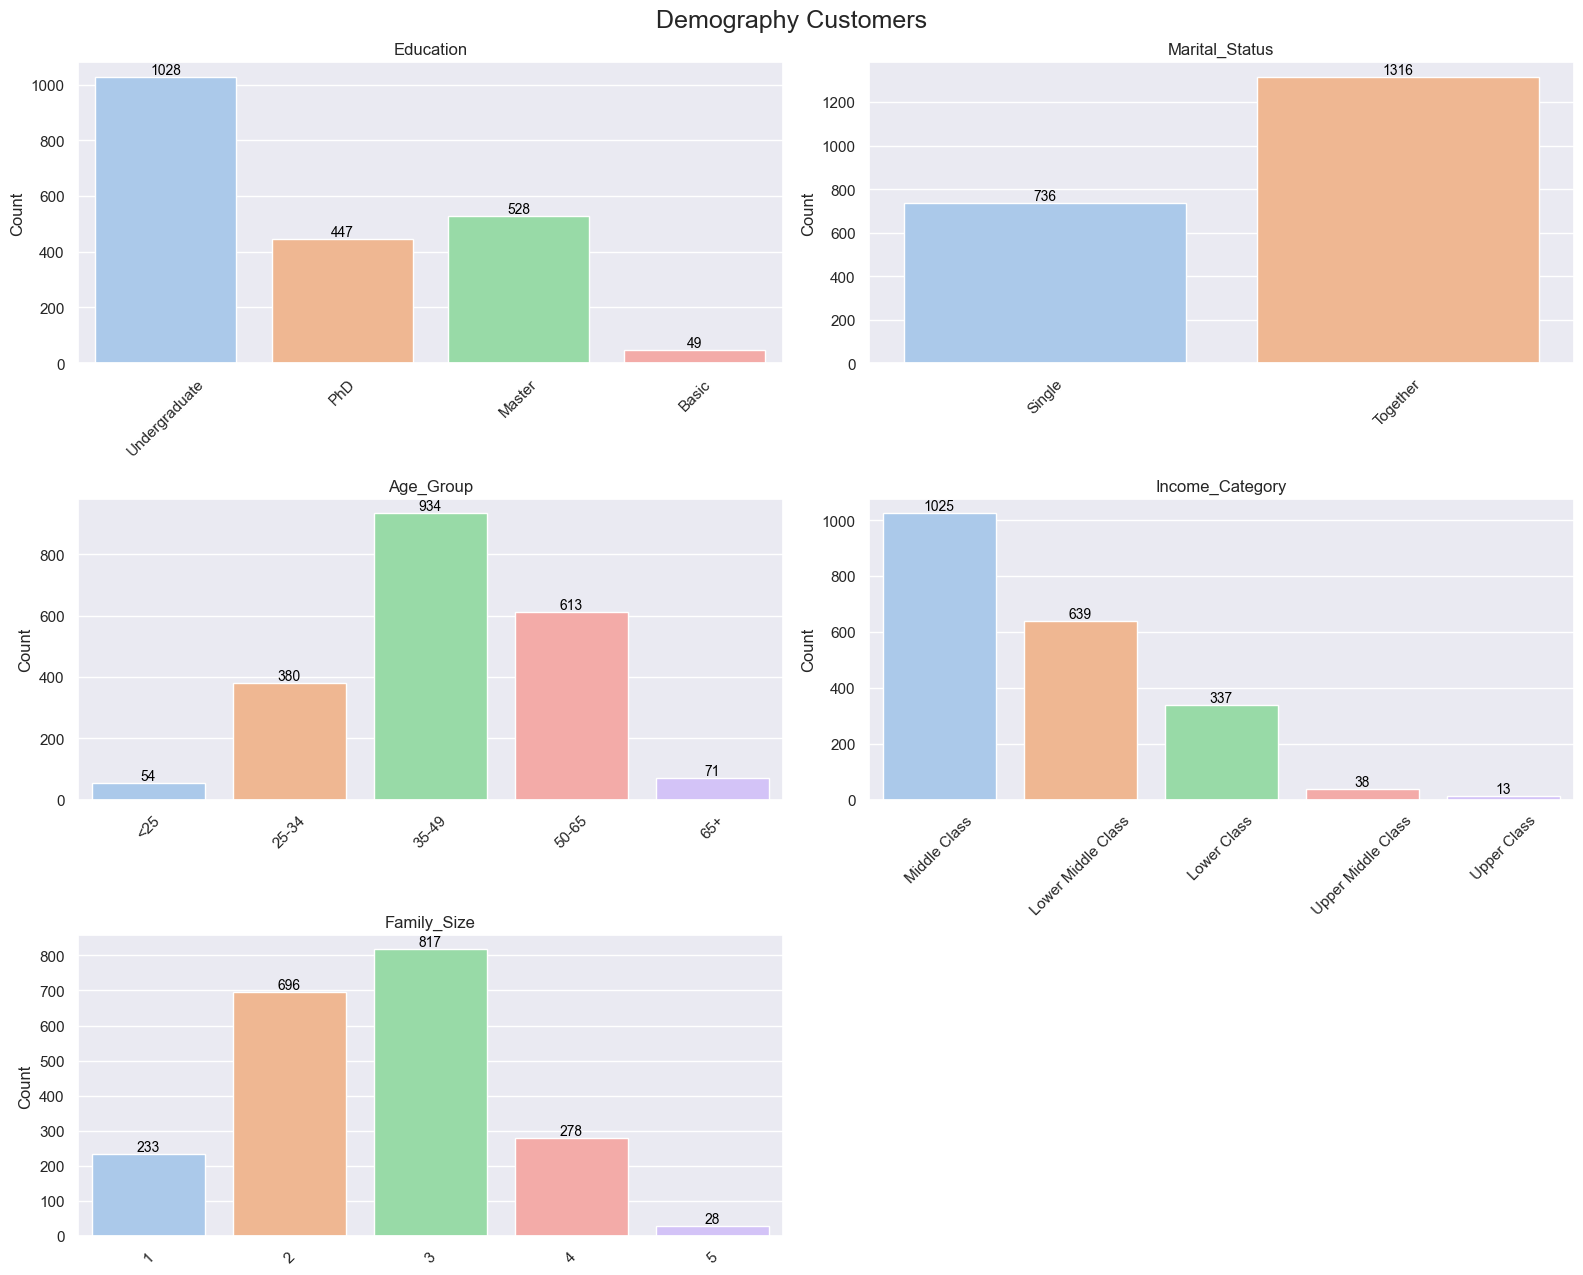

In [8]:
#Visualisasikan demografi customers

# Pilih kolom kategorikal dari dataframe
categorical_columns = df_customer[['Education', 'Marital_Status', 'Age_Group', 'Income_Category', 'Family_Size']]

# Menentukan jumlah baris dan kolom dalam grid subplot
num_columns = 2
num_rows = math.ceil(len(categorical_columns.columns) / num_columns)

# Perbesar ukuran area plot
plt.figure(figsize=(16, 13))

# Membuat countplot untuk setiap kolom
for i, column in enumerate(categorical_columns.columns):
    plt.subplot(num_rows, num_columns, i + 1)
    ax = sns.countplot(x=column, data=df_customer, palette='pastel')
    plt.title(column)
    plt.ylabel('Count')
    plt.xlabel('')

    # Rotasi label sumbu X agar tidak tumpang tindih
    plt.xticks(rotation=45)

    # Menambahkan angka di atas setiap bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', color='black', fontsize=10)

# Menambahkan judul utama untuk semua subplot
plt.suptitle('Demography Customers', fontsize=18, y=0.98)

# Sesuaikan tata letak subplot
plt.tight_layout()
plt.show()

**Insight**

Secara demografi, data customer sebagai berikut:
1. Pendidikan:
- Sebagian besar pelanggan memiliki tingkat pendidikan tertinggi pada kategori Undergraduate (1028 orang, 44%), diikuti oleh Master (528 orang, 23%), dan PhD (447 orang, 19%).
- Pelanggan dengan pendidikan Basic adalah yang paling sedikit, hanya 49 orang (2%).
- Pendidikan yang dominan (Undergraduate dan Master) menunjukkan potensi pelanggan yang terdidik dan kemungkinan memiliki daya beli lebih tinggi.

2. Status Pernikahan:
- Mayoritas pelanggan berada dalam status pernikahan Together (1316 orang, 64%), sedangkan sisanya Single (736 orang, 36%).
- Hal ini menunjukkan bahwa pelanggan dengan status pernikahan Together mendominasi.

3. Kelompok Usia:
- Kelompok usia 35–49 tahun merupakan yang paling banyak, dengan 934 pelanggan (43%).
- Kelompok usia 50–65 tahun berada di urutan kedua dengan 613 pelanggan (28%).
- Pelanggan di bawah usia 25 tahun dan di atas 65 tahun sangat sedikit, masing-masing 54 orang (2.6%) dan 71 orang (3.4%).
- Rentang usia produktif (25–64 tahun) mencakup hampir seluruh pelanggan (94%), menunjukkan bahwa supermarket ini menarik minat pelanggan usia bekerja atau aktif secara ekonomi.

4. Kelompok Pendapatan:
- Kategori Middle Class mendominasi dengan 1025 pelanggan (50%), diikuti oleh Lower Middle Class (639 pelanggan, 31%) dan Lower Class (337 pelanggan, 16%).
- Kategori Upper Middle Class dan Upper Class sangat kecil, masing-masing hanya 38 pelanggan (1.8%) dan 13 pelanggan (0.6%).

5. Jumlah Anggota Keluarga:
- Pelanggan dengan 3 anggota keluarga adalah yang terbanyak, mencapai 817 orang (39%).
- 2 anggota keluarga menempati posisi kedua dengan 696 pelanggan (33%), sementara keluarga kecil dengan 1 anggota keluarga hanya 233 pelanggan (11%).
- Jumlah pelanggan dengan lebih dari 4 anggota keluarga sangat kecil, masing-masing 278 pelanggan (13%) untuk 4 anggota dan hanya 28 pelanggan (1.3%) untuk 5 anggota.
- Kombinasi antara mayoritas pelanggan kategori Middle Class dan jumlah anggota keluarga sebanyak 3 orang menunjukkan karakteristik pelanggan dengan pengeluaran moderat, yang mungkin menjadi fokus pemasaran.

##### **b. Hubungan antara pendapatan dengan variabel lainnya**

Lakukan pengecekan distribusi data dari customer supermarket

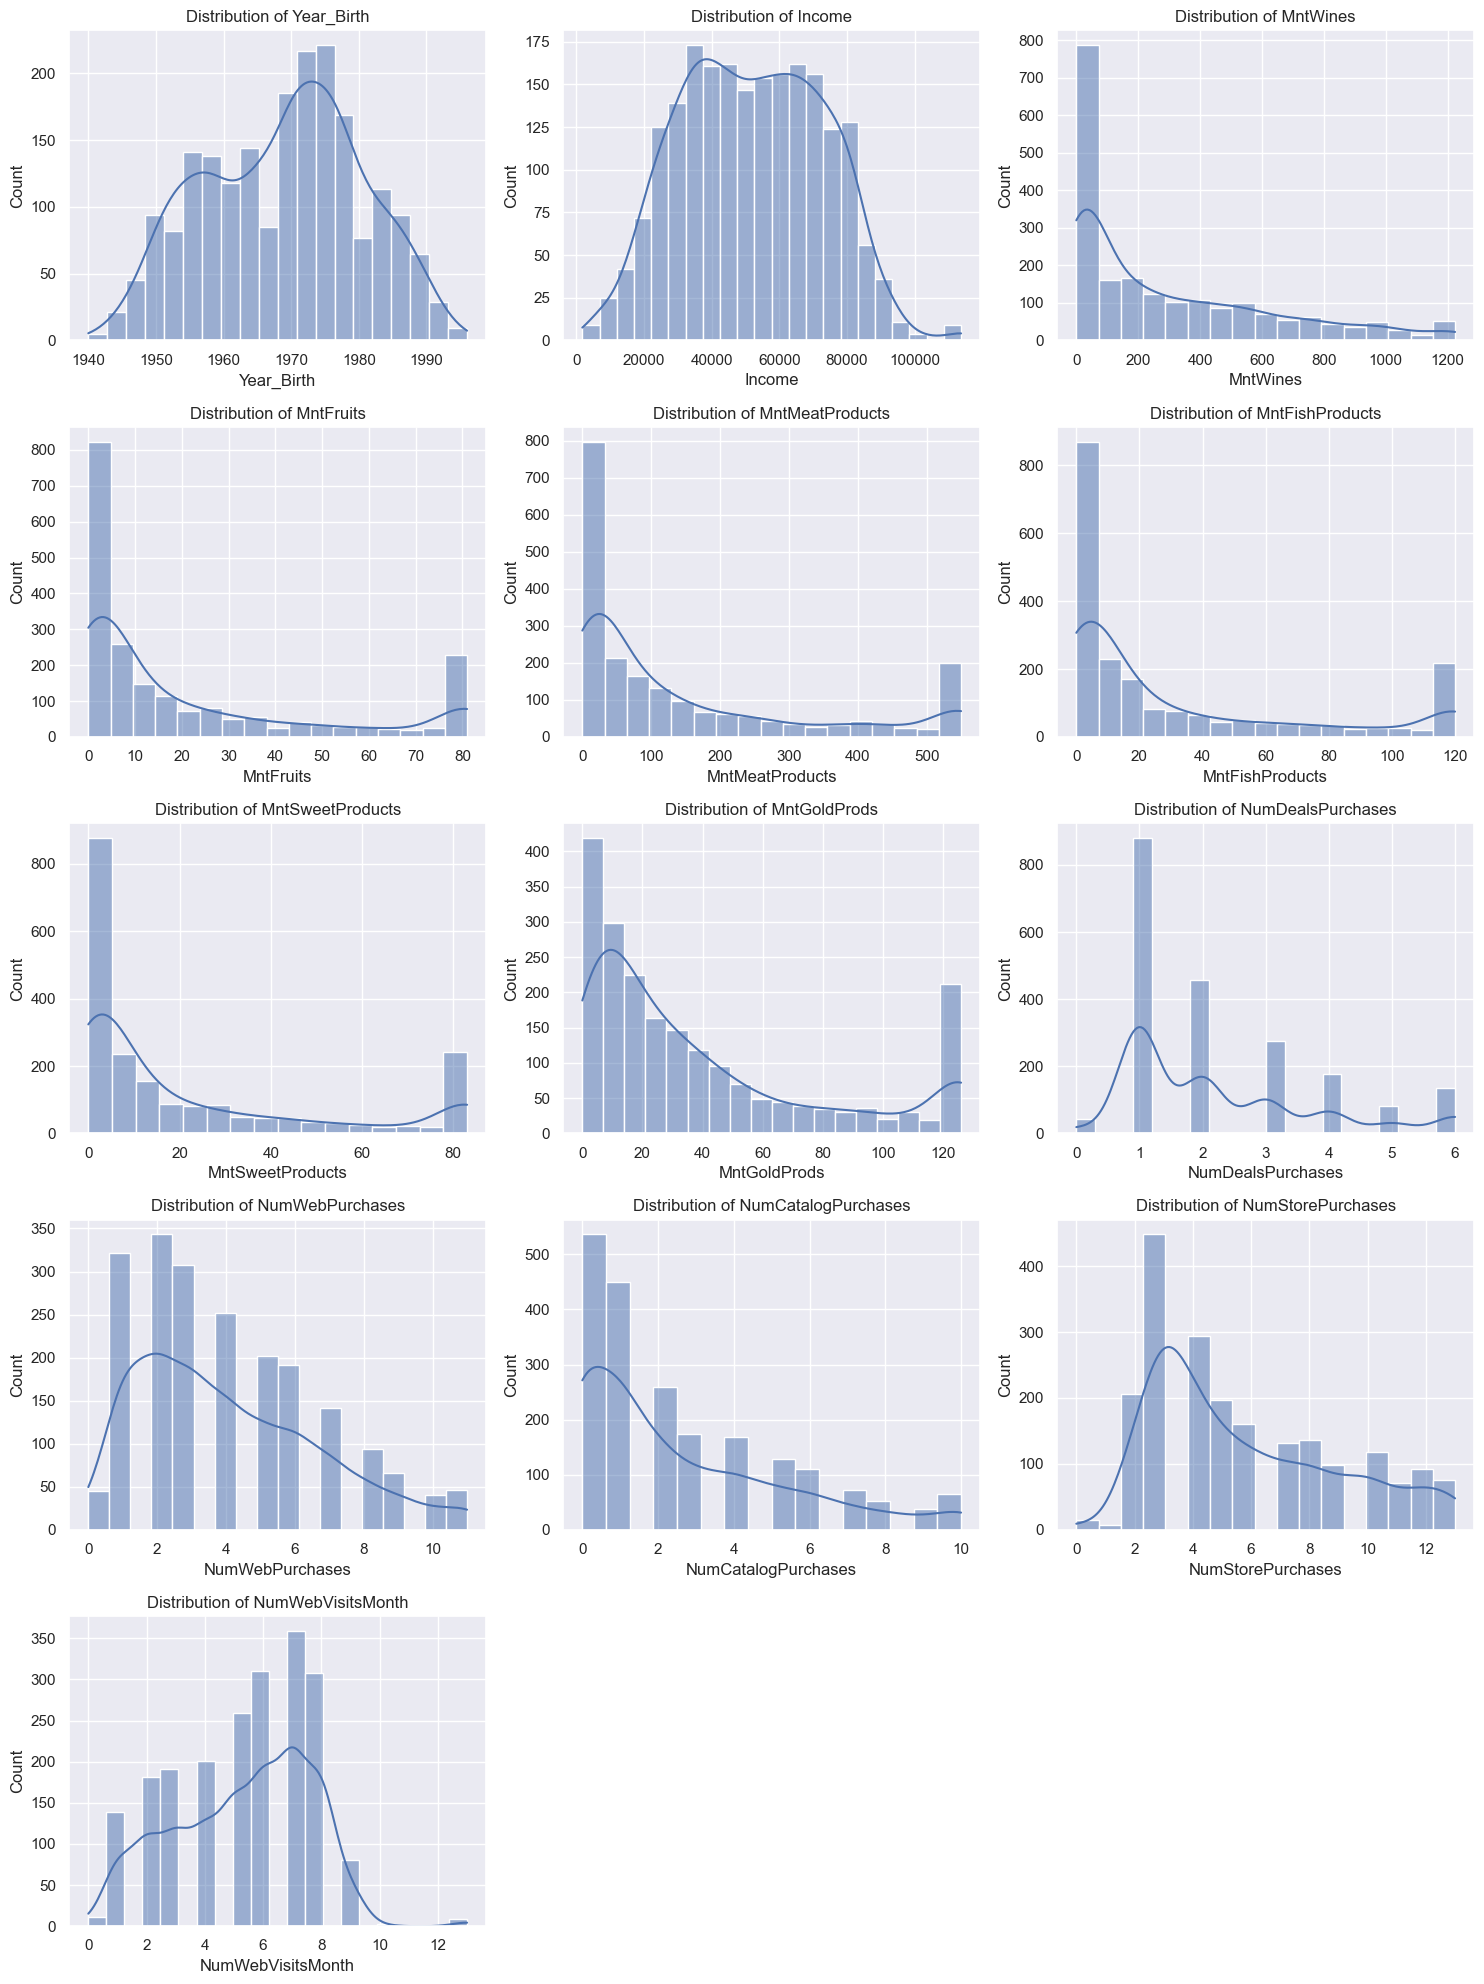

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur tema
sns.set_theme(style="darkgrid")

# Daftar kolom numerik
kolom_numerik = ['Year_Birth', 'Income', 'MntWines', 'MntFruits',
                 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Membuat subplot otomatis untuk semua kolom
fig, axs = plt.subplots(nrows=len(kolom_numerik) // 3 + 1, ncols=3, figsize=(15, 20))
axs = axs.flatten()

# Loop untuk membuat histplot setiap kolom
for i, kolom in enumerate(kolom_numerik):
    sns.histplot(data=df_customer, kde=True, x=kolom, ax=axs[i])
    axs[i].set_title(f'Distribution of {kolom}')

# Menyembunyikan subplot kosong jika kolom tidak habis dibagi 3
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

Untuk menguji lebih detail, mari gunakan uji statistik Kolmogorov-Smirnov untuk melihat apakah hasil distribusi untuk kolom numerik merupakan normal atau tidak normal

In [10]:
import pandas as pd
from scipy.stats import kstest

# Daftar kolom numerik
kolom_numerik = ['Year_Birth', 'Income', 'MntWines', 'MntFruits',
                 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# List untuk menyimpan hasil
hasil_ks = []

# Iterasi untuk uji Kolmogorov-Smirnov di setiap kolom
for kolom in kolom_numerik:
    ks_statistic, ks_pvalue = kstest(df_customer[kolom], 'norm')  # Distribusi normal
    hasil_ks.append({
        'Kolom': kolom,
        'KS_Statistic': ks_statistic,
        'P_Value': ks_pvalue,
        'Distribusi_Normal': 'Ya' if ks_pvalue > 0.05 else 'Tidak'
    })

# Konversi hasil ke DataFrame
df_hasil_ks = pd.DataFrame(hasil_ks)

# Tampilkan hasil dalam bentuk tabel
df_hasil_ks

,Kolom,KS_Statistic,P_Value,Distribusi_Normal
0,Year_Birth,1.000000,0.0,Tidak
1,Income,1.000000,0.0,Tidak
2,MntWines,0.957714,0.0,Tidak
3,MntFruits,0.726275,0.0,Tidak
4,MntMeatProducts,0.978182,0.0,Tidak
5,MntFishProducts,0.797425,0.0,Tidak
6,MntSweetProducts,0.716529,0.0,Tidak
7,MntGoldProds,0.916334,0.0,Tidak
8,NumDealsPurchases,0.820877,0.0,Tidak
9,NumWebPurchases,0.819415,0.0,Tidak


**Insight**

Berdasarkan hasil uji statistik Kolmogorov-Smirnov, apabila p_value > 0,05 maka data distribusi normal sedangkan pada semua kolom numerik p_value = 0,0 sehingga dapat dibuktikan bahwa semua **kolom numerik merupakan data distribusi tidak normal**.

Untuk melihat apakah terdapat hubungan antara Income dengan variable lain, mari gunakan uji statistik Spearman.

In [11]:
#Membuat Tabel Korelasi
# Dataframe dengan variabel numerik
kolom_numerik = ['Year_Birth', 'Income', 'MntWines', 'MntFruits',
                 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Matriks korelasi Spearman
spearman_corr = df_customer[kolom_numerik].corr(method='spearman')

# Tampilkan matriks korelasi
spearman_corr


,Year_Birth,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Year_Birth,1.000000,-0.223215,-0.240675,-0.030453,-0.117702,-0.032874,0.004161,-0.077239,-0.078556,-0.163394,-0.182077,-0.173198,0.135141
Income,-0.223215,1.000000,0.824871,0.574375,0.811693,0.574165,0.562912,0.499849,-0.198998,0.561052,0.787967,0.726321,-0.639575
MntWines,-0.240675,0.824871,1.000000,0.514095,0.821308,0.522773,0.500708,0.575380,0.059448,0.736134,0.822580,0.803887,-0.381550
MntFruits,-0.030453,0.574375,0.514095,1.000000,0.713266,0.706636,0.691677,0.567281,-0.100002,0.468073,0.630340,0.579068,-0.430488
MntMeatProducts,-0.117702,0.811693,0.821308,0.713266,1.000000,0.726888,0.699274,0.638301,-0.030069,0.675284,0.850266,0.777161,-0.483038
MntFishProducts,-0.032874,0.574165,0.522773,0.706636,0.726888,1.000000,0.706151,0.559809,-0.110604,0.469244,0.653559,0.583622,-0.447119
MntSweetProducts,0.004161,0.562912,0.500708,0.691677,0.699274,0.706151,1.000000,0.543939,-0.101038,0.459680,0.624217,0.580876,-0.440467
MntGoldProds,-0.077239,0.499849,0.575380,0.567281,0.638301,0.559809,0.543939,1.000000,0.102352,0.583578,0.649063,0.538201,-0.244054
NumDealsPurchases,-0.078556,-0.198998,0.059448,-0.100002,-0.030069,-0.110604,-0.101038,0.102352,1.000000,0.282234,-0.031136,0.099551,0.397517
NumWebPurchases,-0.163394,0.561052,0.736134,0.468073,0.675284,0.469244,0.459680,0.583578,0.282234,1.000000,0.618028,0.665080,-0.087921


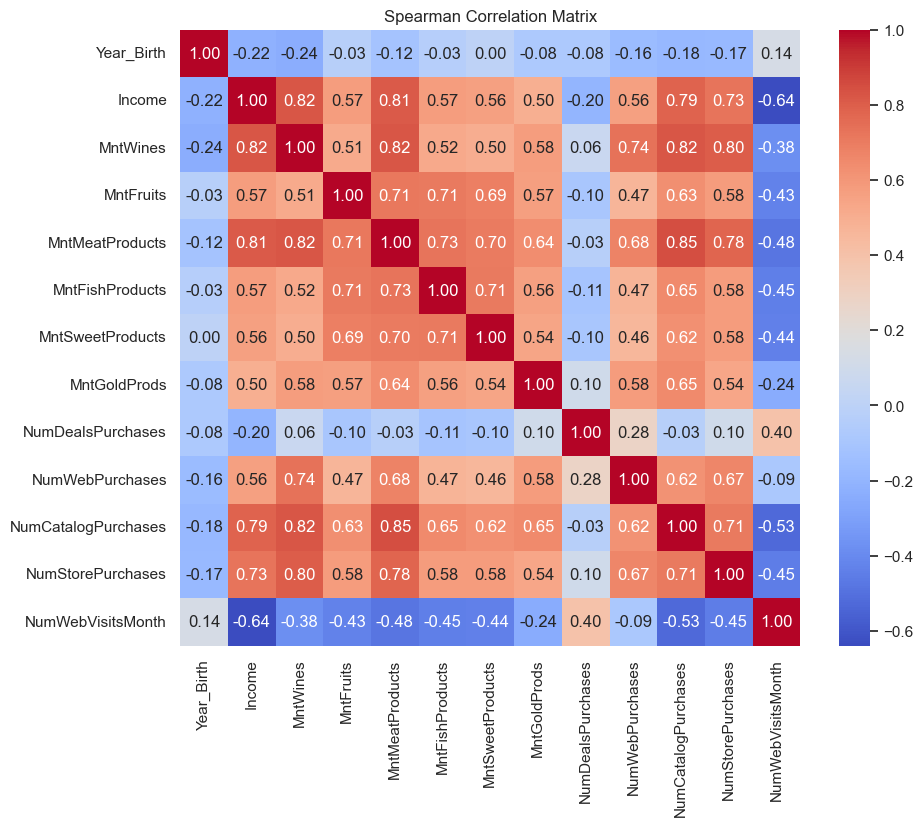

In [12]:
#Visualisasikan dalam heatmap

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix')
plt.show()


**Insight**

1. Income dan MntWines:
- Koefisien korelasi = 0.82 (merah tua).
- Artinya ada hubungan positif yang kuat antara pendapatan pelanggan dan jumlah pembelian wine.

2. Income dan NumWebVisitsMonth:
- Koefisien korelasi = -0.64 (biru tua).
- Hubungan negatif yang cukup kuat. Pelanggan dengan pendapatan tinggi cenderung lebih jarang mengunjungi website.

3. MntWines dan MntMeatProducts:
- Koefisien korelasi = 0.71.
- Hubungan positif yang kuat. Pelanggan yang membeli banyak wine juga cenderung membeli banyak produk daging.


#### **2. Analisis Pembelian:**
##### **a. Total pembelian dan rata-rata pembelian pada setiap kategori produk**

In [13]:
#Membuat kalkulasi thd total pembelian untuk semua kategori produk
df_customer['Total_Amount'] = (
    df_customer['MntWines'] + df_customer['MntFruits'] + 
    df_customer['MntMeatProducts'] + df_customer['MntFishProducts'] + 
    df_customer['MntSweetProducts'] + df_customer['MntGoldProds']
)

#Menghapus kolom 'Total_Amount' sementara dan menyisipkannya di sebelah 'MntGoldProds'
total_amount = df_customer.pop('Total_Amount')
df_customer.insert(df_customer.columns.get_loc('MntGoldProds') + 1, 'Total_Amount', total_amount)

#Menampilkan hasil
df_customer.head(5)                  

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Amount,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Group,Income_Category,Adulthome,Family_Size
0,5524,1957,Undergraduate,Single,58138.0,0,0,2012-09-04,58,635,81,546,120,83,88,1553,3,8,10,4,7,0,0,0,0,0,0,1,57,50-65,Middle Class,1,1
1,2174,1954,Undergraduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,5,0,0,0,0,0,0,0,60,50-65,Lower Middle Class,1,3
2,4141,1965,Undergraduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,4,0,0,0,0,0,0,0,49,35-49,Middle Class,2,2
3,6182,1984,Undergraduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,0,0,0,0,0,0,0,30,25-34,Lower Class,2,3
4,5324,1981,PhD,Together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,5,0,0,0,0,0,0,0,33,25-34,Middle Class,2,3


In [14]:
total_amount.sum()

np.int64(1164938)

In [15]:
total_produk = df_customer[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum()

avg_produk = df_customer[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].mean()

#Membuat DataFrame baru dengan total dan rata-rata
ringkasan_produk = pd.DataFrame({
    'Total Amount': total_produk,
    'Avg Amount': avg_produk.round(2)
}).reset_index()

#Mengganti nama kolom 'index' menjadi 'Produk'
ringkasan_produk.columns = ['Category Product', 'Total Amount', 'Avg Amount']

#Menampilkan tabel
display(ringkasan_produk)

,Category Product,Total Amount,Avg Amount
0,MntWines,620500,302.39
1,MntFruits,44300,21.59
2,MntMeatProducts,308921,150.55
3,MntFishProducts,65263,31.80
4,MntSweetProducts,45425,22.14
5,MntGoldProds,80529,39.24


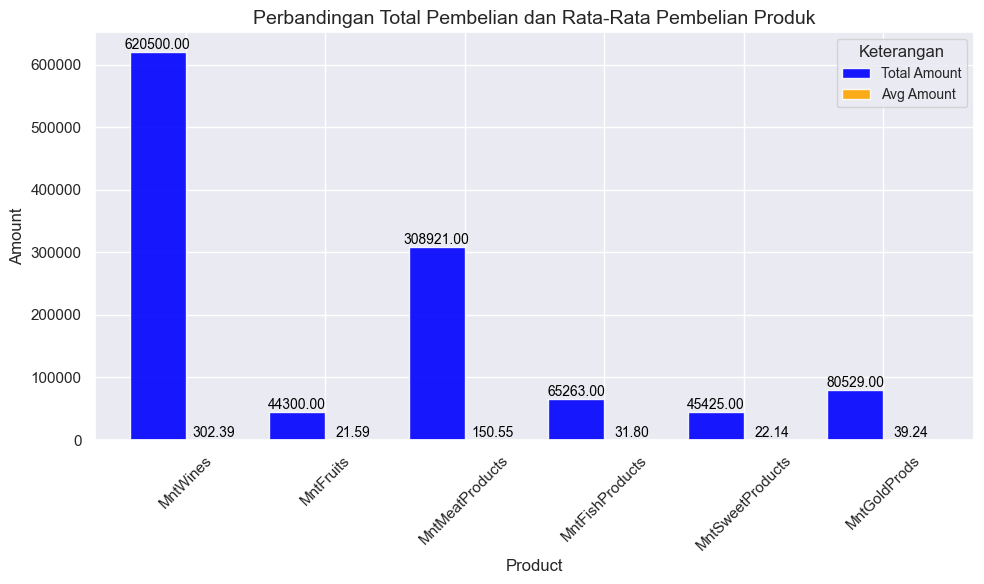

In [16]:
#Visualisasikan dalam grafik bar

import matplotlib.pyplot as plt

# Membuat grafik batang tergrup
ax = ringkasan_produk.set_index('Category Product')[['Total Amount', 'Avg Amount']].plot(
    kind='bar', figsize=(10, 6), color=['blue', 'orange'], alpha=0.9, width=0.8
)

# Menambahkan label dan judul
plt.title('Perbandingan Total Pembelian dan Rata-Rata Pembelian Produk', fontsize=14)
plt.ylabel('Amount', fontsize=12)
plt.xlabel('Product', fontsize=12)

# Menambahkan anotasi nilai di atas batang
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Hanya tambahkan anotasi untuk nilai positif
        ax.annotate(
            f'{height:.2f}',  # Format nilai (2 desimal untuk Avg Amount)
            (p.get_x() + p.get_width() / 2., height),  # Posisi teks
            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points'
        )

# Memutar label kategori produk agar lebih mudah dibaca
plt.xticks(rotation=45)

# Menambahkan legenda
plt.legend(title='Keterangan', fontsize=10)

# Menampilkan grafik
plt.tight_layout()
plt.show()



**Insight**

1. Produk dengan Total Pembelian Tertinggi
- Produk kategori Wines menempati posisi teratas dengan total pembelian sebesar 620,500. Hal ini menunjukkan bahwa produk ini memiliki tingkat permintaan yang sangat tinggi, sehingga menjadi kontributor utama terhadap total pembelian.

2. Produk dengan Total Pembelian Terendah
- Fruits mencatat total pembelian terendah di antara semua kategori, yaitu sebesar 44,300. Angka ini menunjukkan bahwa kontribusi produk ini terhadap total pembelian relatif kecil dibandingkan kategori lainnya.

3. Rata-Rata Nilai Transaksi
- Rata-rata nilai transaksi (Avg Amount) untuk semua kategori produk relatif kecil dibandingkan dengan total pembelian. Hal ini mengindikasikan bahwa jumlah transaksi per kategori cukup besar, tetapi nilai per transaksi cenderung rendah. Sebagai contoh, Wines memiliki rata-rata transaksi tertinggi (302.39), sedangkan Fruits mencatat nilai rata-rata terendah (21.59).

Berdasarkan hasil rata-rata pembelian di atas, dapat disimpulkan bahwa rata-rata nilai transaksi setiap kategori relatif kecil dibandingkan dengan total pembelian. Hal ini menunjukkan bahwa kategori produk dengan total pembelian tinggi, seperti Wines, kemungkinan memiliki frekuensi pembelian yang tinggi meskipun nilai per transaksi cenderung rendah. Disisi lain, kategori dengan total pembelian rendah, seperti Fruits, mungkin mencerminkan pembelian dalam volume kecil atau frekuensi pembelian yang lebih rendah dibandingkan kategori lainnya.

##### **b. Kanal pembelian yang paling sering digunakan**

In [17]:
df_customer.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Total_Amount', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Age_Group',
       'Income_Category', 'Adulthome', 'Family_Size'],
      dtype='object')

Apakah terdapat perbedaan jumlah pembelian di 3 kanal yaitu web, catalog, dan store?

Mari gunakan uji statistik Kruskal-Wallis untuk membuktikan hasil yg lebih akurat

`Hipotesis`:
- H0: Tidak terdapat perbedaan antara jumlah pembelian di kanal web, catalog, dan store
- H1: Terdapat perbedaan signifikan jumlah pembelian di kanal web, catalog, dan store

`Signifikansi`/ Tingkat Resiko ($\alpha$) -> $\alpha = 0.05$

`Pengambilan kesimpulan` :

- p-value $\leq \alpha$ : Reject $H_{0}$

In [18]:
#Membuat grouping kanal
kanal_group = df_customer[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

#Ubah nama kolom
kanal_group = kanal_group.rename(columns={
    'NumWebPurchases': 'Web',
    'NumCatalogPurchases': 'Catalog',
    'NumStorePurchases': 'Store'
})

# Menghitung median dan mengubahnya menjadi DataFrame
kanal_median = pd.DataFrame(kanal_group.median(), columns=['Median'])

# Menampilkan hasil dalam bentuk DataFrame
kanal_median.index.name = 'Pembelian via Kanal'
display(kanal_median)

,Median
Pembelian via Kanal,
Web,4.0
Catalog,2.0
Store,5.0


In [19]:
#Dokumentasi Kruskal
from scipy.stats import kruskal

#Mengambil nilai dari setiap kolom
web_purchases = kanal_group['Web']
catalog_purchases = kanal_group['Catalog']
store_purchases = kanal_group['Store']

#Melakukan uji Kruskal-Wallis
kruskal_stats, pvalue = kruskal(web_purchases, catalog_purchases, store_purchases)

#Menampilkan p-value
pvalue

np.float64(8.081117979516323e-249)

In [20]:
# conclusion

if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue}. pvalue > 0.05. Fail to reject Ho. 
    Artinya tidak ada perbedaan signifikan antara jumlah pembelian di web, catalog, dan store.
    ''')
else:
    print(f'''
    pvalue = {pvalue}. pvalue <= 0.05. Reject Ho. 
    Kita punya cukup bukti bahwa terdapat perbedaan signifikan antara jumlah pembelian di web, catalog, dan store
    ''')


    pvalue = 8.081117979516323e-249. pvalue <= 0.05. Reject Ho. 
    Kita punya cukup bukti bahwa terdapat perbedaan signifikan antara jumlah pembelian di web, catalog, dan store
    


In [21]:
#Menjumlahkan kolom pembelian dari berbagai kanal
kanal_produk = df_customer[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()

#Membuat DataFrame baru dengan total pembelian
ringkasan_kanal = pd.DataFrame({
    'Kanal Distribusi': kanal_produk,
}).reset_index()

#Mengganti nama nilai 'NumWebPurchases', 'NumCatalogPurchases', dan 'NumStorePurchases' pada DataFrame baru
ringkasan_kanal['index'] = ringkasan_kanal['index'].replace({
    'NumWebPurchases': 'Pembelian via Web',
    'NumCatalogPurchases': 'Pembelian via Katalog',
    'NumStorePurchases': 'Pembelian di Toko'
})

#Mengganti nama kolom untuk kejelasan
ringkasan_kanal.columns = ['Kanal Distribusi', 'Total Pembelian']

#Menampilkan tabel
display(ringkasan_kanal)

,Kanal Distribusi,Total Pembelian
0,Pembelian via Web,8352
1,Pembelian via Katalog,5374
2,Pembelian di Toko,11845


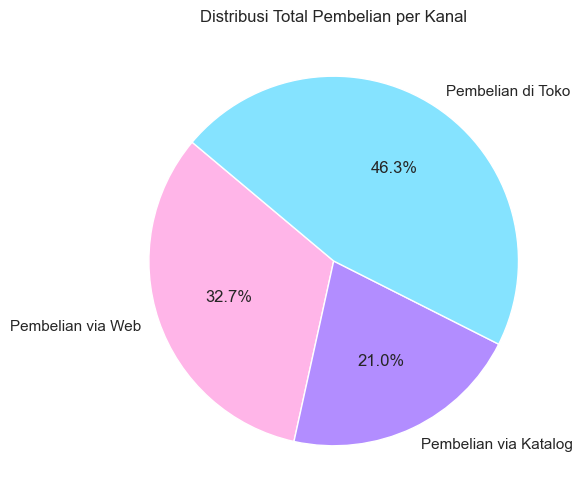

In [22]:
#Visualisasikan dalam Pie Chart

import matplotlib.pyplot as plt

colors = ['#FFB5E8', '#B28DFF', '#85E3FF']

plt.figure(figsize=(7, 6))
plt.pie(ringkasan_kanal['Total Pembelian'], labels=ringkasan_kanal['Kanal Distribusi'], autopct='%1.1f%%', startangle=140,  colors=colors)
plt.title('Distribusi Total Pembelian per Kanal')
plt.show()


**Insight**

Berdasarkan hasil analisa diatas, berikut insight yg dapat disampaikan:
1. Kanal pembelian via Toko memiliki proporsi terbesar, yaitu 46,3% dari total pembelian. Hal ini menunjukkan bahwa hampir separuh dari total pelanggan lebih memilih untuk membeli melalui toko fisik.
2. Kanal Web menempati posisi kedua dengan 32,7%, menunjukkan bahwa cukup banyak pelanggan yang memilih berbelanja melalui website.
3. Kanal Katalog menyumbang 21%, yang merupakan proporsi terkecil di antara ketiga kanal pembelian.

##### **c. Hubungan antara Pendapatan dengan Total Pembelian**

In [23]:
df_customer[['Income', 'Total_Amount']].describe()

,Income,Total_Amount
count,2052.000000,2052.000000
mean,51913.710039,567.708577
std,20980.639463,546.348595
min,1730.000000,5.000000
25%,35434.750000,68.750000
50%,51533.000000,395.000000
75%,68468.250000,989.000000
max,113734.000000,2094.000000


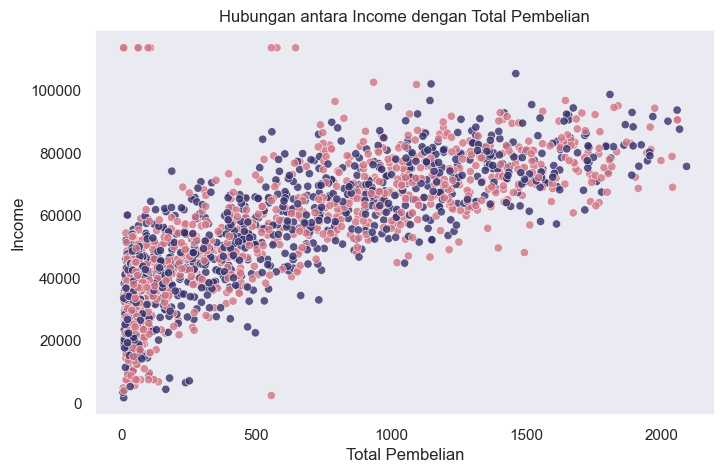

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Palet warna kustom
my_palette = ['#37306B', '#D27685']
sns.set_palette(my_palette)

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_customer, 
    x='Total_Amount', 
    y='Income', 
    hue='Income',  # Tambahkan hue jika ingin gradien atau kategori
    palette=my_palette,
    alpha=0.8,
    legend=False 
)
plt.title('Hubungan antara Income dengan Total Pembelian')
plt.xlabel('Total Pembelian')
plt.ylabel('Income')
plt.grid()
plt.show()



In [25]:
# Untuk melakukan pengujian dengan lebih akurat mari gunakan uji korelasi Spearman
# Korelasi Spearman
from scipy.stats import spearmanr

# Hipotesis
# H0 : Tidak ada hubungan antara Income dengan Total Pembelian
# H1 : Ada hubungan signifikan antara Income dengan Total Pembelian

# Korelasi Spearman
corr, p_value = spearmanr(df_customer['Income'], df_customer['Total_Amount'])
print(f"Koefisien Korelasi Spearman: {corr:.2f}")
print(f"P-value: {p_value: .2f}")

Koefisien Korelasi Spearman: 0.84
P-value:  0.00


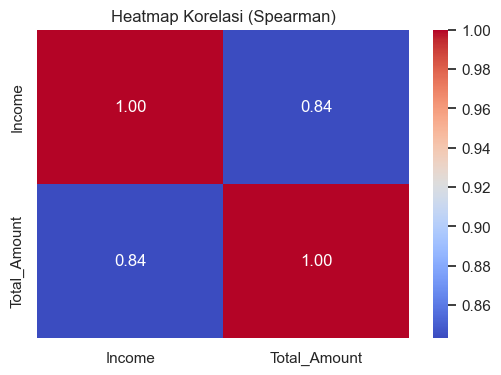

In [26]:
# Visualisasi dengan heatmap

# Hitung matriks korelasi Spearman secara manual
correlation_matrix = df_customer[['Income', 'Total_Amount']].corr(method='spearman')

plt.figure(figsize=(6, 4))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    cbar=True
)
plt.title('Heatmap Korelasi (Spearman)')
plt.show()

**Insight**

Dari hasil analisis diatas, dapat disimpulkan yaitu:
- Koefisien Korelasi Spearman = 0.84:
  - Menunjukkan hubungan yang sangat kuat dan positif antara Income (pendapatan) dan Total_Amount (total pembelian). Artinya, semakin tinggi pendapatan seseorang, cenderung semakin tinggi pula total pembelian mereka. Hubungan ini bersifat monotonic, tetapi tidak harus linear.
- H0 ditolak apabila p_value < 0,05. P-value = 0.00, artinya H0 ditolak: Ada hubungan signifikan antara Income dengan Total Pembelian
  - Hasil ini menunjukkan bahwa hubungan antara kedua variabel sangat signifikan secara statistik (dengan tingkat signifikansi umum 0.05 atau 5%). Dengan kata lain, peluang bahwa hubungan ini terjadi secara kebetulan sangat kecil.

#### **3. Analisis Perilaku Pelanggan:**

- Melakukan segmentasi pelanggan menggunakan pendekatan **RFM Analysis** untuk memahami pola keterlibatan mereka.
[Click untuk detail referensi: RFM Analysis]("https://www.putler.com/rfm-analysis/#Applying_the_RFM_Score_Formula").

Pola perilaku pelanggan lebih mudah dipahami menggunakan RFM Analysis, yang didasarkan pada tiga dimensi utama berikut:
1. `Recency (R)`: Seberapa baru pelanggan melakukan transaksi terakhir
2. `Frequency (F)`: Seberapa sering pelanggan melakukan transaksi dalam periode tertentu
3. `Monetary (M)`: Berapa total uang yang dihabiskan oleh pelanggan

In [27]:
# Memindahkan kolom Recency setelah Family_Size menggunakan insert
recency_column = df_customer.pop('Recency')  # Mengeluarkan kolom Recency
df_customer.insert(df_customer.columns.get_loc('Family_Size') + 1, 'Recency', recency_column)  # Menyisipkan Recency setelah Family_Size

# Tentukan bins berdasarkan rentang pembagian yang merata
bins = [0, 422.8, 840.6, 1258.4, 1676.2, 2094]

# Membuat kategori berdasarkan bins yang sudah ditentukan
df_customer['Frequency'] = pd.cut(df_customer['Total_Amount'], bins=bins)

#Monetary: Copy dari total amount
df_customer['Monetary'] = df_customer['Total_Amount']

#Gabungkan Recency, Frequency, dan Monetary ke dalam DataFrame RFM
rfm = df_customer[['Recency', 'Frequency', 'Monetary']].copy()

#Menampilkan hasil RFM
rfm.head(5)

,Recency,Frequency,Monetary
0,58,"(1258.4, 1676.2]",1553
1,38,"(0.0, 422.8]",27
2,26,"(422.8, 840.6]",776
3,26,"(0.0, 422.8]",53
4,94,"(0.0, 422.8]",422


Berikut merupakan Segmentasi Customer berdasarkan RFM Analysis

![Customer Segment](Customer_Segment.png)

In [28]:
# Membuat kolom F berdasarkan kuantil
bins = [0, 422.8, 840.6, 1258.4, 1676.2, 2094]
rfm["F"] = pd.cut(df_customer['Total_Amount'], bins=bins, labels=[1, 2, 3, 4, 5])  # Frequency, Semakin tinggi nilai Frequency, semakin baik

# Melakukan hal yang sama untuk Recency dan Monetary
rfm["R"] = pd.qcut(df_customer["Recency"], 5, labels=[5, 4, 3, 2, 1])  # Recency, Semakin kecil nilai Recency, semakin baik
rfm["M"] = pd.qcut(df_customer["Monetary"], 5, labels=[1, 2, 3, 4, 5])  # Monetary, Semakin tinggi nilai Monetary, semakin baik

# Membuat skor RFM
rfm["RFM_Score"] = rfm["R"].astype(str) + rfm["F"].astype(str) + rfm["M"].astype(str)

seg_map = {
    r'111|112|121|131|141|151': 'Lost',
    r'123|122|132|124|231|241|251|233|232|223|222|212|211': 'Hibernating',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'155|154|144|214|215|115|114|113': "Can't Lose",
    r'331|321|312|221|213|231|241|251': 'About to Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'Recent Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalists',
    r'543|544|435|355|354|345|344|335': 'Loyal',
    r'555|554|545|545|454|455|445': 'Champions'
}

# Membuat kolom Segment berdasarkan skor RFM
rfm['Segment'] = rfm['RFM_Score'].replace(seg_map, regex=True)

# Menyusun ulang kolom-kolom sesuai urutan yang diinginkan: 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM_Score', 'Segment'
rfm = rfm[['Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM_Score', 'Segment']]

# Menambahkan kolom-kolom dari rfm ke df_customer menggunakan pd.concat
df_customer = pd.concat([df_customer, rfm[['R', 'F', 'M', 'RFM_Score', 'Segment']]], axis=1)

# Menampilkan beberapa baris pertama dari DataFrame RFM
rfm.sample(10)


,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
130,42,"(422.8, 840.6]",632,3,2,4,324,Need Attention
1568,28,"(0.0, 422.8]",71,4,1,2,412,Recent Customers
826,1,"(422.8, 840.6]",446,5,2,3,523,Promising
957,34,"(422.8, 840.6]",573,4,2,3,423,Potential Loyalists
1040,16,"(0.0, 422.8]",357,5,1,3,513,Promising
608,50,"(0.0, 422.8]",33,3,1,1,311,Recent Customers
574,74,"(422.8, 840.6]",611,2,2,3,223,Hibernating
337,71,"(422.8, 840.6]",507,2,2,3,223,Hibernating
571,64,"(0.0, 422.8]",55,2,1,1,211,Hibernating
36,37,"(840.6, 1258.4]",913,4,3,4,434,Need Attention


In [29]:
# Melihat kolom yang sudah dibuat sebelumnya
df_customer[['Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM_Score', 'Segment']].sample(10)


,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
1515,9,"(0.0, 422.8]",311,5,1,3,513,Promising
865,81,"(840.6, 1258.4]",1023,1,3,4,134,At Risk
21,42,"(422.8, 840.6]",555,3,2,3,323,Potential Loyalists
940,29,"(422.8, 840.6]",491,4,2,3,423,Potential Loyalists
1860,92,"(422.8, 840.6]",664,1,2,4,124,Hibernating
673,29,"(0.0, 422.8]",29,4,1,1,411,Recent Customers
280,17,"(840.6, 1258.4]",883,5,3,4,534,Need Attention
1077,15,"(0.0, 422.8]",125,5,1,2,512,Recent Customers
1890,79,"(0.0, 422.8]",223,2,1,3,213,About to Sleep
1734,97,"(840.6, 1258.4]",906,1,3,4,134,At Risk


In [30]:
df_customer['Segment'].unique()

array(['Loyal', 'Recent Customers', 'Promising', "Can't Lose",
       'Potential Loyalists', 'Hibernating', 'About to Sleep', 'At Risk',
       'Champions', 'Lost', 'Need Attention'], dtype=object)

In [31]:
display(
    df_customer[df_customer['Segment'] == 'Champions'][['Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM_Score', 'Segment']].sample(10)
)

,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
410,33,"(1258.4, 1676.2]",1328,4,4,5,445,Champions
421,1,"(1258.4, 1676.2]",1664,5,4,5,545,Champions
158,20,"(1258.4, 1676.2]",1581,4,4,5,445,Champions
1034,32,"(1676.2, 2094.0]",1959,4,5,5,455,Champions
1978,4,"(1258.4, 1676.2]",1372,5,4,5,545,Champions
1806,2,"(1676.2, 2094.0]",1904,5,5,5,555,Champions
1389,29,"(1258.4, 1676.2]",1468,4,4,5,445,Champions
2011,36,"(1258.4, 1676.2]",1486,4,4,5,445,Champions
824,38,"(1258.4, 1676.2]",1426,4,4,5,445,Champions
1366,36,"(1676.2, 2094.0]",1813,4,5,5,455,Champions


In [32]:
df_customer['Segment'].value_counts()

Segment
Recent Customers       425
At Risk                276
Promising              265
Hibernating            255
Need Attention         195
Lost                   166
About to Sleep         129
Champions              119
Loyal                   96
Can't Lose              65
Potential Loyalists     61
Name: count, dtype: int64

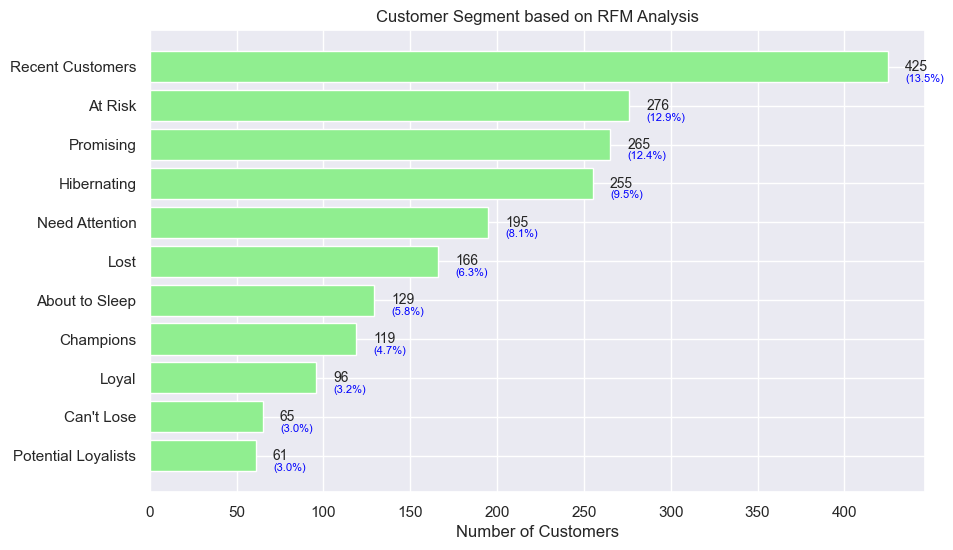

In [33]:
# Visualisasikan dalam Horizontal Bar

# Menghitung jumlah pelanggan di setiap segmen dan mengurutkan
df_segment_sorted = df_customer['Segment'].value_counts().sort_values(ascending=True)

# Menghitung persentase dari setiap segmen
percentage = (df_segment_sorted / df_segment_sorted.sum()) * 100

# Membuat horizontal bar chart dengan jumlah pelanggan
plt.figure(figsize=(10,6))
bars = plt.barh(df_segment_sorted.index, df_segment_sorted, color='lightgreen')

# Menambahkan angka jumlah pelanggan dan persentase pada setiap bar
for bar in bars:
    width = bar.get_width()
    # Menambahkan angka jumlah pelanggan
    plt.text(width + 10, bar.get_y() + bar.get_height()/2, 
             str(int(width)), va='center', ha='left', fontsize=10)
    # Menambahkan persentase
    seg_name = bar.get_y()  # Mendapatkan nama segmen
    perc = percentage[df_segment_sorted.index[int(seg_name)]]  # Menyesuaikan persentase berdasarkan segmen
    plt.text(width + 10, bar.get_y() + bar.get_height()/2 - 0.3, 
             f"({perc:.1f}%)", va='center', ha='left', fontsize=8, color='blue')

# Menambahkan label dan judul
plt.xlabel('Number of Customers')
plt.title('Customer Segment based on RFM Analysis')

# Menampilkan grafik
plt.show()


**Insight**

In [34]:
import pandas as pd

# Data untuk tabel
segmentation_data = {
    "Segment": [
        "Champions", "Loyal Customers", "Potential Loyalists", "Recent Customers", "Promising", 
        "Need Attention", "About to Sleep", "At Risk", "Can't Lose", "Lost"
    ],
    "Customer Count": [
        119, 96, 61, 425, 265, 195, 129, 276, 65, 166
    ],
    "Percentage (%)": [
        5.80, 4.68, 2.97, 20.71, 12.91, 9.50, 6.29, 13.45, 3.17, 8.09
    ],
    "Karakteristik": [
        "Pelanggan ini melakukan pembelian baru-baru ini, sering bertransaksi, dan memiliki nilai pembelian tinggi.",
        "Pelanggan yang sering bertransaksi dengan nilai yang konsisten.",
        "Pelanggan ini sering bertransaksi tetapi mungkin belum lama menjadi pelanggan.",
        "Pelanggan baru yang belum menunjukkan pola pembelian yang konsisten.",
        "Pelanggan yang menunjukkan potensi untuk menjadi lebih loyal di masa depan.",
        "Pelanggan ini pernah aktif tetapi aktivitasnya mulai menurun.",
        "Pelanggan ini hampir tidak aktif dan mungkin akan berhenti berbelanja.",
        "Pelanggan ini menunjukkan tanda-tanda akan meninggalkan perusahaan, dengan frekuensi pembelian yang menurun.",
        "Pelanggan berharga tinggi yang menunjukkan tanda-tanda akan berhenti berbelanja.",
        "Pelanggan ini sudah lama tidak bertransaksi, frekuansi dan nilai transaksi juga sangat rendah."
    ],
    "Strategi": [
        "Pertahankan mereka dengan memberikan penghargaan, penawaran eksklusif, dan program loyalitas.",
        "Berikan mereka program loyalitas, undang mereka untuk acara khusus, dan teruskan komunikasi yang baik.",
        "Dorong mereka untuk tetap setia dengan memberikan pengalaman berbelanja yang baik dan promosi khusus.",
        "Fokus pada onboarding yang baik, penawaran selamat datang, dan tunjukkan nilai produk/jasa Anda.",
        "Teruskan pendekatan dengan promosi yang relevan dan komunikasi yang menarik.",
        "Lakukan survei untuk memahami alasan penurunan aktivitas, berikan penawaran yang menarik untuk mengaktifkan kembali mereka.",
        "Kirim pengingat, promosi khusus, atau insentif untuk mendorong mereka kembali berbelanja.",
        "Segera hubungi mereka dengan penawaran menarik atau diskon besar untuk mencegah churn.",
        "Fokuskan upaya retensi dengan penawaran personal, layanan pelanggan yang sangat baik, dan program loyalitas yang menarik.",
        "Tidak ada yang perlu diperbuat pada segmen ini."
    ]
}

# Membuat DataFrame
summary_segment = pd.DataFrame(segmentation_data)


# Menambahkan format untuk kolom 'Percentage (%)' dan mengatur teks align untuk body dan header
styled_summary = summary_segment.style.format({'Percentage (%)': '{:.2f}'}).set_properties(**{'text-align': 'left'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]  # Mengatur teks pada header agar rata kiri
)

# Menampilkan tabel yang telah diformat
display(styled_summary)

,Segment,Customer Count,Percentage (%),Karakteristik,Strategi
0,Champions,119,5.80,"Pelanggan ini melakukan pembelian baru-baru ini, sering bertransaksi, dan memiliki nilai pembelian tinggi.","Pertahankan mereka dengan memberikan penghargaan, penawaran eksklusif, dan program loyalitas."
1,Loyal Customers,96,4.68,Pelanggan yang sering bertransaksi dengan nilai yang konsisten.,"Berikan mereka program loyalitas, undang mereka untuk acara khusus, dan teruskan komunikasi yang baik."
2,Potential Loyalists,61,2.97,Pelanggan ini sering bertransaksi tetapi mungkin belum lama menjadi pelanggan.,Dorong mereka untuk tetap setia dengan memberikan pengalaman berbelanja yang baik dan promosi khusus.
3,Recent Customers,425,20.71,Pelanggan baru yang belum menunjukkan pola pembelian yang konsisten.,"Fokus pada onboarding yang baik, penawaran selamat datang, dan tunjukkan nilai produk/jasa Anda."
4,Promising,265,12.91,Pelanggan yang menunjukkan potensi untuk menjadi lebih loyal di masa depan.,Teruskan pendekatan dengan promosi yang relevan dan komunikasi yang menarik.
5,Need Attention,195,9.50,Pelanggan ini pernah aktif tetapi aktivitasnya mulai menurun.,"Lakukan survei untuk memahami alasan penurunan aktivitas, berikan penawaran yang menarik untuk mengaktifkan kembali mereka."
6,About to Sleep,129,6.29,Pelanggan ini hampir tidak aktif dan mungkin akan berhenti berbelanja.,"Kirim pengingat, promosi khusus, atau insentif untuk mendorong mereka kembali berbelanja."
7,At Risk,276,13.45,"Pelanggan ini menunjukkan tanda-tanda akan meninggalkan perusahaan, dengan frekuensi pembelian yang menurun.",Segera hubungi mereka dengan penawaran menarik atau diskon besar untuk mencegah churn.
8,Can't Lose,65,3.17,Pelanggan berharga tinggi yang menunjukkan tanda-tanda akan berhenti berbelanja.,"Fokuskan upaya retensi dengan penawaran personal, layanan pelanggan yang sangat baik, dan program loyalitas yang menarik."
9,Lost,166,8.09,"Pelanggan ini sudah lama tidak bertransaksi, frekuansi dan nilai transaksi juga sangat rendah.",Tidak ada yang perlu diperbuat pada segmen ini.


#### **4. Evaluasi Kampanye Pemasaran**: Menilai tingkat keberhasilan kampanye pemasaran yang telah dilakukan

##### **a. Melihat trend penerimaan customer terhadap campaign yang dilakukan Supermarket**

In [35]:
# Menghitung jumlah value count
value_counts = df_customer[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum()

# Menyusun DataFrame baru
result_df = pd.DataFrame({
    'Campaign': value_counts.index,
    'Tidak Menerima': len(df_customer) - value_counts.values,
    'Menerima': value_counts.values
}).set_index('Campaign')

# Menambahkan kolom persentase
result_df['Persentase Menerima'] = (result_df['Menerima'] / len(df_customer) * 100).round(2)
result_df['Persentase Tidak Menerima'] = (result_df['Tidak Menerima'] / len(df_customer) * 100).round(2)

# Menampilkan hasil
result_df

,Tidak Menerima,Menerima,Persentase Menerima,Persentase Tidak Menerima
Campaign,,,,
AcceptedCmp1,1918,134,6.53,93.47
AcceptedCmp2,2026,26,1.27,98.73
AcceptedCmp3,1902,150,7.31,92.69
AcceptedCmp4,1894,158,7.70,92.30
AcceptedCmp5,1905,147,7.16,92.84
Response,1742,310,15.11,84.89


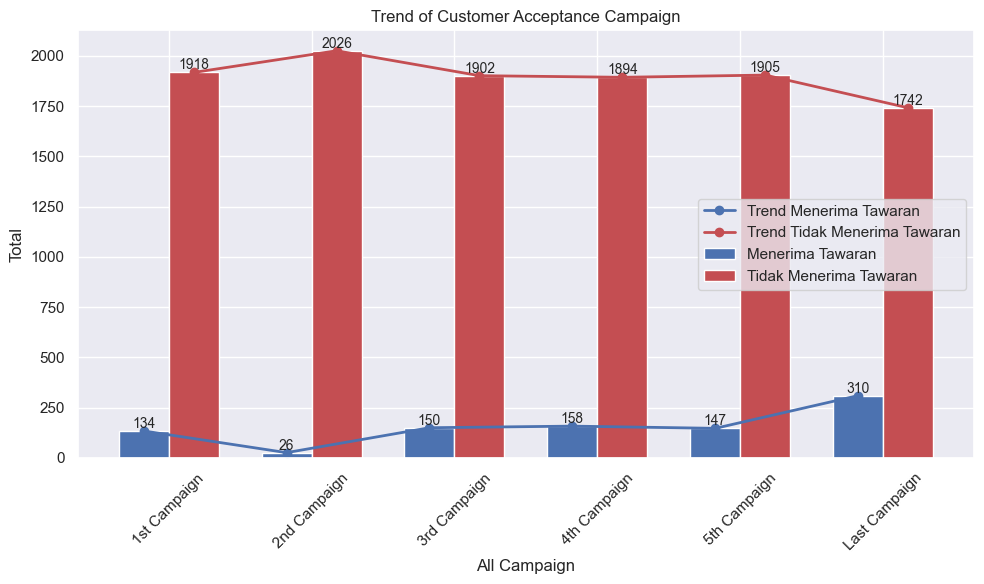

In [36]:
import matplotlib.pyplot as plt

# Mengambil jumlah penerimaan dan ketidakpenerimaan tawaran
accepted_campaigns = result_df['Menerima']
rejected_campaigns = result_df['Tidak Menerima']

# Daftar nama kampanye (misalnya, 'Kampanye 1', 'Kampanye 2', dst.)
campaign_names = ['1st Campaign', '2nd Campaign', '3rd Campaign', '4th Campaign', '5th Campaign', 'Last Campaign']

# Membuat grafik figure dan axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot untuk yang menerima tawaran (Bar Chart)
bar_width = 0.35
index = range(len(campaign_names))

bars_accepted = ax.bar(index, accepted_campaigns.values, bar_width, color='b', label='Menerima Tawaran')
bars_rejected = ax.bar([i + bar_width for i in index], rejected_campaigns.values, bar_width, color='r', label='Tidak Menerima Tawaran')

# Menambahkan angka pada setiap bar
for bar in bars_accepted:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, str(yval), ha='center', va='bottom', fontsize=10)

for bar in bars_rejected:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, str(yval), ha='center', va='bottom', fontsize=10)

# Menambahkan Line Chart untuk menunjukkan tren
ax.plot(index, accepted_campaigns.values, marker='o', color='b', linestyle='-', linewidth=2, label='Trend Menerima Tawaran')

# Garis untuk "Tidak Menerima Tawaran" menggunakan data yang tepat
ax.plot([i + bar_width for i in index], rejected_campaigns.values, marker='o', color='r', linestyle='-', linewidth=2, label='Trend Tidak Menerima Tawaran')

# Menambahkan label dan judul
ax.set_title('Trend of Customer Acceptance Campaign')
ax.set_xlabel('All Campaign')
ax.set_ylabel('Total')
ax.set_xticks([i + bar_width / 2 for i in index])  # Menyesuaikan label sumbu X
ax.set_xticklabels(campaign_names, rotation=45)

# Menampilkan grid dan layout
ax.grid(True)
plt.tight_layout()

# Menampilkan grafik
ax.legend()
plt.show()


**Insight**

1. Persentase Penerimaan Tawaran:
- Pada kampanye pertama, 134 pelanggan menerima tawaran, sedangkan 1918 menolak. Tingkat penerimaan masih rendah dibandingkan total pelanggan.
- Pada kampanye kedua, hanya 26 pelanggan yang menerima tawaran, sementara 2026 menolak. Ini menunjukkan bahwa kampanye ini memiliki daya tarik yang paling rendah di antara semua kampanye.
- Pada kampanye ketiga hingga kelima, jumlah penerimaan meningkat (150, 158, dan 147 pelanggan), tetapi tetap kecil dibandingkan dengan jumlah yang menolak.
- Kampanye terakhir menunjukkan peningkatan penerimaan yang signifikan, dengan 310 pelanggan menerima tawaran dan 1742 menolak.

2. Tren Penerimaan dan Penolakan:
- Penolakan terhadap tawaran tetap tinggi di semua kampanye, menunjukkan bahwa mayoritas pelanggan kurang tertarik dengan penawaran yang diberikan.
- Penerimaan menunjukkan tren menurun hingga kampanye kedua, tetapi ada sedikit peningkatan di kampanye ketiga hingga kelima dan peningkatan besar di kampanye terakhir.

3. Kampanye yang Paling Tidak Efektif:
- Kampanye kedua adalah yang paling tidak efektif, dengan hanya 26 pelanggan yang menerima tawaran dari total 2052. Hal ini menunjukkan perlu adanya evaluasi mendalam terhadap strategi atau isi penawaran pada kampanye ini.
 
4. Kampanye yang Paling Efektif:
- Kampanye terakhir adalah yang paling efektif, dengan 310 pelanggan menerima tawaran. Ini menunjukkan bahwa ada perbaikan strategi atau relevansi tawaran yang lebih sesuai dengan preferensi pelanggan.

##### **b. Distribusi dan Segmentasi Customer Berdasarkan Respon Campaign**

In [37]:
df_customer[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum()

AcceptedCmp1    134
AcceptedCmp2     26
AcceptedCmp3    150
AcceptedCmp4    158
AcceptedCmp5    147
Response        310
dtype: int64

In [38]:
## Distribusi Segmen Customer
# Menghitung jumlah kampanye yang diterima
df_customer['Total_Responses'] = df_customer[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                                              'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

# Membuat fungsi untuk segmentasi
def segment(row):
    if row['Total_Responses'] == 0:
        return 'Tidak Respon'
    elif row['Total_Responses'] <= 3:  # 1 hingga 3 respons
        return 'Respon Parsial'
    else:  # Lebih dari 3 respons
        return 'Respon Tinggi'

# Tambahkan kolom Segment ke DataFrame
df_customer['Campaign_Response'] = df_customer.apply(segment, axis=1)

# Distribusi Segmen
segment_counts = df_customer['Campaign_Response'].value_counts()
print("Campaign Response:")
print(segment_counts)

Campaign Response:
Campaign_Response
Tidak Respon      1486
Respon Parsial     524
Respon Tinggi       42
Name: count, dtype: int64


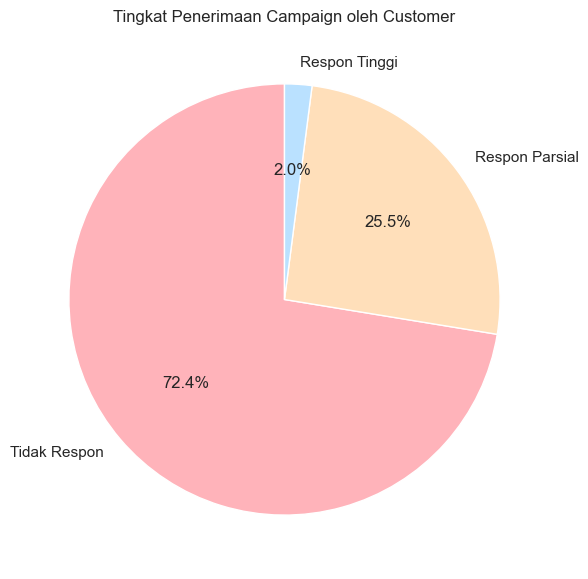

In [39]:
# Visualisasi Distribusi
# Pie Chart dengan warna pastel
plt.figure(figsize=(7, 7))
colors = ['#FFB3BA', '#FFDFBA', '#BAE1FF']  # Contoh warna pastel
segment_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Tingkat Penerimaan Campaign oleh Customer')
plt.ylabel('')  # Menghapus label sumbu Y
plt.show()

**Insight**
1. Distribusi Respon Kampanye
- Tidak Respon (72,4%): Mayoritas pelanggan tidak merespons kampanye sama sekali. Ini menunjukkan bahwa strategi kampanye mungkin tidak efektif untuk sebagian besar pelanggan.
- Respon Parsial (25,5%): Sebagian pelanggan menunjukkan minat terbatas terhadap kampanye. Pelanggan ini mungkin merespons kampanye tertentu yang relevan dengan kebutuhan mereka. Kampanye lebih tersegmentasi dan personal bisa meningkatkan engagement.
- Respon Tinggi (2%): Hanya sebagian kecil pelanggan yang secara konsisten merespons kampanye. Segmen ini bisa dianggap sebagai pelanggan loyal atau paling engaged.
Mereka berpotensi menjadi target utama untuk program loyalitas atau upselling.

In [40]:
## Segmentasi Customer
# Analisis Rata-rata Karakteristik per Segmen
segment_analysis = df_customer.groupby('Campaign_Response').agg({
    'Income': 'median',  
    'Family_Size': 'median',  
    'Recency': 'median',  
    'NumWebPurchases': 'median',
    'NumCatalogPurchases': 'median',
    'NumStorePurchases': 'median',
    'MntWines': 'median', 
    'MntFruits': 'median', 
    'MntMeatProducts': 'median',
    'MntFishProducts': 'median', 
    'MntSweetProducts': 'median', 
    'MntGoldProds': 'median'
}).reset_index()

# Menambahkan modus untuk kolom kategorikal
segment_analysis['Age_Group'] = df_customer.groupby('Campaign_Response')['Age_Group'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).values
segment_analysis['Marital_Status'] = df_customer.groupby('Campaign_Response')['Marital_Status'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).values

print("Analisis Karakteristik per Segmen:")
segment_analysis


Analisis Karakteristik per Segmen:


,Campaign_Response,Income,Family_Size,Recency,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age_Group,Marital_Status
0,Respon Parsial,63050.5,2.0,40.0,5.0,4.0,6.0,485.5,17.0,133.0,21.0,16.0,36.5,35-49,Together
1,Respon Tinggi,83670.5,2.0,46.0,5.0,7.0,8.0,967.5,27.5,413.0,44.5,52.0,58.0,35-49,Together
2,Tidak Respon,46996.5,3.0,51.0,3.0,1.0,4.0,98.5,6.0,44.5,10.0,7.0,18.0,35-49,Together


**Insight**

Karakteristik Segmen Customer terhadap Respon Campaign

a. Segmen Respon Parsial
- Pendapatan (Income): Median pendapatan di segmen ini adalah 63.050,5, menunjukkan daya beli yang moderat.
- Ukuran Keluarga (Family_Size): Ukuran keluarga rata-rata adalah 2 orang (cenderung keluarga kecil).
- Recency: Rata-rata 40 hari sejak pembelian terakhir, menunjukkan keterlibatan yang lebih aktif dibanding segmen "Tidak Respon".
- Usia (Age): Usia median adalah 45 tahun (kategori 35-49).
- Perilaku Pembelian:
  - Pembelian Online: Rata-rata 5 pembelian web, cukup aktif secara digital.
  - Pembelian Katalog: Rata-rata 4 pembelian, menunjukkan preferensi terhadap pembelian non-digital.
  - Pembelian di Toko: 6 pembelian, menunjukkan keseimbangan preferensi antara digital dan fisik.
- Pengeluaran Produk: Dominasi di anggur (485,5) dan produk daging (133,0) dengan pengeluaran sedang di kategori lainnya.
- Karakteristik Demografi: Mayoritas adalah usia 35-49 tahun.
Status pernikahan adalah Together, yaitu berpasangan.

b. Segmen Respon Tinggi
- Pendapatan (Income): Median pendapatan di segmen ini adalah 83.670,5, menunjukkan daya beli yang tinggi.
- Ukuran Keluarga (Family_Size): Sama dengan segmen "Respon Parsial" (2 orang).
- Recency: Rata-rata 46 hari, sedikit lebih tinggi dari segmen "Respon Parsial".
- Usia (Age): Median usia adalah 42 tahun (kategori 35-49).
- Perilaku Pembelian:
  - Pembelian Online: Rata-rata 5 pembelian web, sama dengan segmen "Respon Parsial".
  - Pembelian Katalog: 7 pembelian, menunjukkan preferensi tinggi untuk katalog.
  - Pembelian di Toko: 8 pembelian, paling tinggi di semua segmen.
- Pengeluaran Produk: Pengeluaran paling tinggi untuk anggur (967,5) dan produk daging (413,0), diikuti oleh produk emas (58,0), menunjukkan preferensi terhadap produk premium.
- Karakteristik Demografi: Sama seperti segmen lain (usia 35-49 tahun, status Together).

c. Segmen Tidak Respon
- Pendapatan (Income): Median pendapatan hanya 46.996,5, terendah di antara semua segmen.
- Ukuran Keluarga (Family_Size): Ukuran keluarga rata-rata lebih besar (3 orang), menunjukkan bahwa mereka mungkin lebih fokus pada kebutuhan keluarga.
- Recency: Rata-rata 51 hari, menunjukkan keterlibatan terendah (jarang melakukan pembelian).
- Usia (Age): Median usia adalah 44 tahun (kategori 35-49).
- Perilaku Pembelian:
  - Pembelian Online: Hanya 3 pembelian, terendah di semua segmen.
  -  Pembelian Katalog: Hanya 1 pembelian, menunjukkan ketidakaktifan terhadap kampanye berbasis katalog.
  - Pembelian di Toko: 4 pembelian, cukup rendah dibandingkan segmen lain.
- Pengeluaran Produk: Pengeluaran sangat rendah di semua kategori, termasuk anggur (98,5) dan daging (44,5).
- Karakteristik Demografi: Sama seperti segmen lain (usia 35-49 tahun, status Together).




#### **5. Cohort Analysis**: Menganalisis tren peningkatan dan penurunan jumlah customer dari tahun 2012 - 2014

In [41]:
# Pengecekan tipe data Dt_Customer harusnya sudah sesuai menjadi datetime
df_customer['Dt_Customer'].dtypes

dtype('<M8[ns]')

In [42]:
# Filter data untuk tahun 2012 hingga 2014
filtered_df = df_customer[(df_customer['Dt_Customer'].dt.year >= 2012) & (df_customer['Dt_Customer'].dt.year <= 2014)]

# Membuat kolom 'Cohort_Month'
filtered_df['Cohort_Month'] = filtered_df['Dt_Customer'].dt.to_period('M')

# Menghitung jumlah pelanggan per bulan
monthly_counts = filtered_df.groupby('Cohort_Month').size().reset_index(name='Customer_Count')

# Memisahkan data per tahun
monthly_counts['Year'] = monthly_counts['Cohort_Month'].dt.year


In [43]:
monthly_counts

,Cohort_Month,Customer_Count,Year
0,2012-07,2,2012
1,2012-08,107,2012
2,2012-09,90,2012
3,2012-10,85,2012
4,2012-11,90,2012
5,2012-12,75,2012
6,2013-01,100,2013
7,2013-02,88,2013
8,2013-03,95,2013
9,2013-04,80,2013


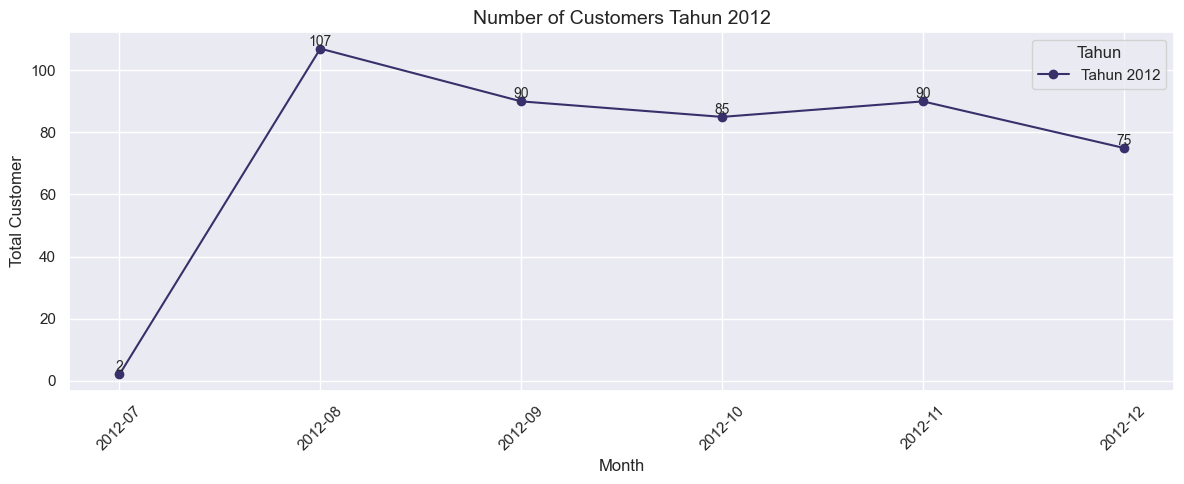

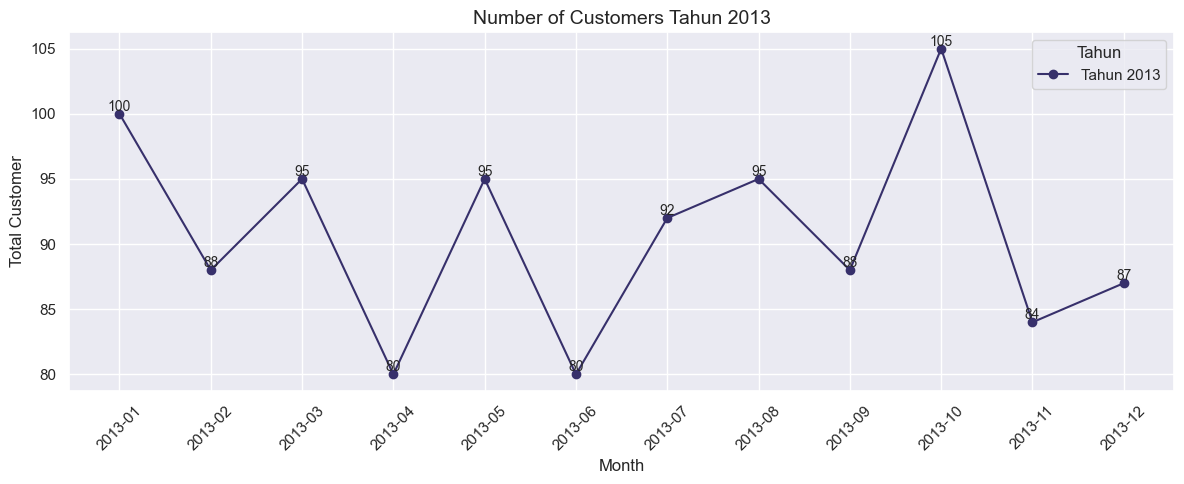

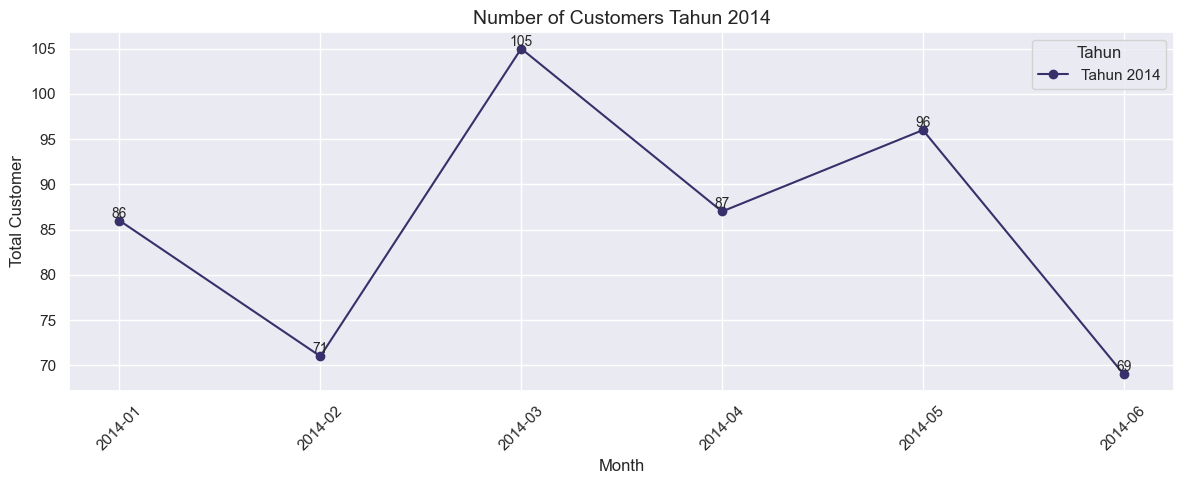

In [44]:
# Visualisasi dengan line chart per tahun
for year in [2012, 2013, 2014]:
    data_year = monthly_counts[monthly_counts['Year'] == year]
    plt.figure(figsize=(12, 5))
    plt.plot(data_year['Cohort_Month'].astype(str), data_year['Customer_Count'], marker='o', label=f'Tahun {year}')
    for i, count in enumerate(data_year['Customer_Count']):
        plt.text(i, count, str(count), fontsize=10, ha='center', va='bottom')
    plt.xticks(rotation=45)
    plt.title(f'Number of Customers Tahun {year}', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Customer', fontsize=12)
    plt.legend(title='Tahun')
    plt.tight_layout()
    plt.show()

**Insight**

**2012**
  - Lonjakan Awal: Ada peningkatan pelanggan yang signifikan pada bulan Agustus (107 pelanggan) setelah bulan Juli yang hanya memiliki 2 pelanggan. 
  - Stabilisasi: Jumlah pelanggan setelah bulan Agustus hingga Desember relatif stabil, dengan kisaran 75–107 pelanggan.

**2013**
  - Jumlah pelanggan yang bergabung di setiap bulan pada tahun 2013 cukup fluktuatif. Ada bulan dengan jumlah pelanggan yang rendah (misalnya, April dan Juni), diikuti oleh peningkatan signifikan pada bulan berikutnya.
  - Puncak: Bulan Oktober memiliki jumlah pelanggan tertinggi (105 pelanggan).

**2014**
  - Jumlah pelanggan mengalami penurunan tajam dari Januari (86 pelanggan) ke Februari (71 pelanggan).
  - Maret menunjukkan puncak jumlah pelanggan tertinggi (105 pelanggan), yang merupakan kenaikan signifikan dari Februari.
  - Stabilitas Menurun: Pada bulan Mei dan Juni terjadi penurunan jumlah pelanggan (96 ke 69 pelanggan), yang bisa menjadi sinyal untuk mengevaluasi strategi pemasaran atau engagement pelanggan.

#### **6. Evaluasi Engagement Website**

##### **a. Persentase Pengguna Berdasarkan Frekuensi**

In [45]:
#Hitung persentase pengunjung untuk setiap jumlah kunjungan
kunjungan_counts = df_customer["NumWebVisitsMonth"].value_counts().reset_index()
kunjungan_counts.columns = ["Jumlah_Kunjungan_Web", "Jumlah_Customer"]

# Menghitung total pengunjung
total_pengunjung = kunjungan_counts["Jumlah_Customer"].sum()

# Menambahkan kolom persentase
kunjungan_counts["Persentase"] = (kunjungan_counts["Jumlah_Customer"] / total_pengunjung) * 100

# Membulatkan persentase hingga 2 desimal
kunjungan_counts["Persentase"] = kunjungan_counts["Persentase"].round(2)

# Mengurutkan berdasarkan jumlah kunjungan web (Jumlah_Kunjungan_Web)
kunjungan_counts = kunjungan_counts.sort_values(by="Jumlah_Kunjungan_Web", ascending=True).reset_index(drop=True)

# Menampilkan tabel dengan persentase
print("Tabel Persentase Pengunjung:")
kunjungan_counts

Tabel Persentase Pengunjung:


,Jumlah_Kunjungan_Web,Jumlah_Customer,Persentase
0,0,11,0.54
1,1,139,6.77
2,2,182,8.87
3,3,191,9.31
4,4,201,9.80
5,5,259,12.62
6,6,310,15.11
7,7,359,17.50
8,8,308,15.01
9,9,80,3.90


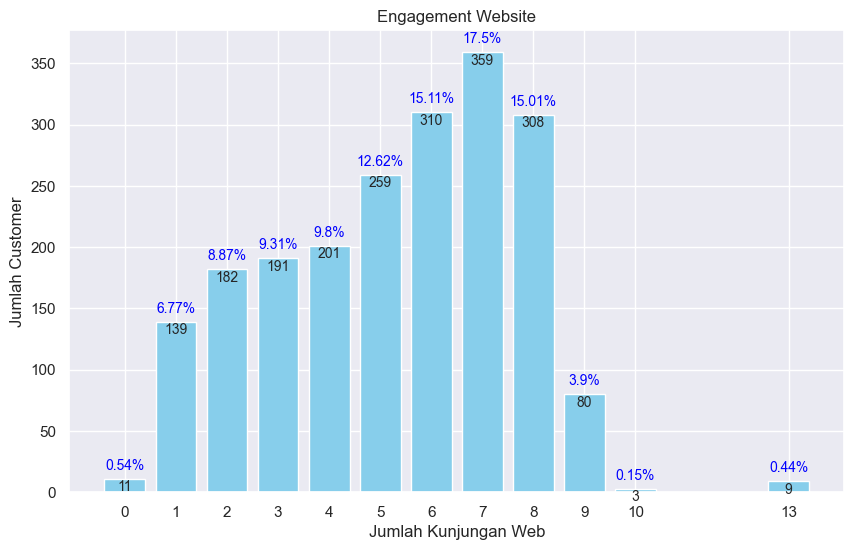

In [46]:
# Visualisasi dengan Bar Plot
# Membuat bar plot untuk jumlah pengunjung
plt.figure(figsize=(10, 6))
bars = plt.bar(kunjungan_counts["Jumlah_Kunjungan_Web"], kunjungan_counts["Jumlah_Customer"], color='skyblue')

# Menambahkan jumlah pengunjung dan persentase pada setiap bar
for bar, jumlah, percentage in zip(bars, kunjungan_counts["Jumlah_Customer"], kunjungan_counts["Persentase"]):
    yval = bar.get_height()  # tinggi bar (jumlah pengunjung)
    # Menambahkan jumlah kunjungan pada bar
    plt.text(bar.get_x() + bar.get_width()/2, yval - 1, f'{jumlah}', ha='center', va='top', fontsize=10)
    # Menambahkan persentase pada bar
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{percentage}%', ha='center', va='bottom', fontsize=10, color='blue')

# Menambahkan label dan judul
plt.title("Engagement Website")
plt.xlabel("Jumlah Kunjungan Web")
plt.ylabel("Jumlah Customer")
plt.xticks(kunjungan_counts["Jumlah_Kunjungan_Web"])
plt.show()



**Insight**
- Sebagian besar pelanggan melakukan kunjungan sebanyak 6-7 kali (17.5% dan 15.01% masing-masing), menunjukkan bahwa engagement website Supermarket berada di level menengah. Hal ini menunjukkan bahwa website menarik perhatian pelangan dalam jumlah interaksi yang konsisten.
- Hanya 0.54% pelanggan yang memiliki 0 kunjungan, menunjukkan bahwa hampir semua pelanggan memiliki setidaknya satu interaksi di website.
- Kunjungan yang sangat tinggi (lebih dari 9 kali) sangat jarang terjadi, dengan hanya 3.9% untuk 9 kali kunjungan dan kurang dari 1% untuk 10 kali atau lebih.

##### **b. Segmentasi Customer berdasarkan Jumlah Kunjungan Website**

In [47]:
# Melihat summary dari Segment
df_customer['Segment'].value_counts()

Segment
Recent Customers       425
At Risk                276
Promising              265
Hibernating            255
Need Attention         195
Lost                   166
About to Sleep         129
Champions              119
Loyal                   96
Can't Lose              65
Potential Loyalists     61
Name: count, dtype: int64

In [48]:
# Melihat summary dari NumWebVisitsMonth
df_customer['NumWebVisitsMonth'].value_counts().sort_index()

NumWebVisitsMonth
0      11
1     139
2     182
3     191
4     201
5     259
6     310
7     359
8     308
9      80
10      3
13      9
Name: count, dtype: int64

In [49]:
# Melihat statistika deskriptif dari NumWebVisitsMonth
df_customer['NumWebVisitsMonth'].describe()

count    2052.000000
mean        5.301657
std         2.353900
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        13.000000
Name: NumWebVisitsMonth, dtype: float64

In [50]:
# Segmentasi berdasarkan jumlah kunjungan (NumWebVisitsMonth)
def segmentasi_kunjungan(row):
    if row <= 3:
        return 'Low Engagement'
    elif 4 <= row <= 7:
        return 'Medium Engagement'
    else:
        return 'High Engagement'

# Menambahkan kolom 'Engagement' berdasarkan 'NumWebVisitsMonth'
df_customer['Engagement'] = df_customer['NumWebVisitsMonth'].apply(segmentasi_kunjungan)

# Menampilkan tabel dengan segmentasi berdasarkan kunjungan
print("Segmentasi Berdasarkan Jumlah Kunjungan:")
df_customer[['NumWebVisitsMonth', 'Segment', 'Engagement']].head()

Segmentasi Berdasarkan Jumlah Kunjungan:


,NumWebVisitsMonth,Segment,Engagement
0,7,Loyal,Medium Engagement
1,5,Recent Customers,Medium Engagement
2,4,Promising,Medium Engagement
3,6,Recent Customers,Medium Engagement
4,5,Can't Lose,Medium Engagement


In [51]:
# Menghitung jumlah pelanggan dalam setiap segmen kunjungan dan RFM
segmen_kunjungan = df_customer.groupby(['Engagement', 'Segment']).size().reset_index(name='Jumlah_Pelanggan')

# Menampilkan hasil analisis segmen berdasarkan jumlah kunjungan dan RFM
print("\nAnalisis Jumlah Pelanggan Berdasarkan Kunjungan dan Segmen RFM:")
segmen_kunjungan


Analisis Jumlah Pelanggan Berdasarkan Kunjungan dan Segmen RFM:


,Engagement,Segment,Jumlah_Pelanggan
0,High Engagement,About to Sleep,34
1,High Engagement,At Risk,23
2,High Engagement,Can't Lose,16
3,High Engagement,Champions,8
4,High Engagement,Hibernating,68
5,High Engagement,Lost,40
6,High Engagement,Loyal,10
7,High Engagement,Need Attention,16
8,High Engagement,Potential Loyalists,14
9,High Engagement,Promising,52


In [52]:
# Melihat hasil Engagement berdasarkan Segmen
df_customer.groupby('Segment')['Engagement'].value_counts()

Segment              Engagement       
About to Sleep       Medium Engagement     87
                     High Engagement       34
                     Low Engagement         8
At Risk              Low Engagement       148
                     Medium Engagement    105
                     High Engagement       23
Can't Lose           Medium Engagement     31
                     Low Engagement        18
                     High Engagement       16
Champions            Low Engagement        72
                     Medium Engagement     39
                     High Engagement        8
Hibernating          Medium Engagement    153
                     High Engagement       68
                     Low Engagement        34
Lost                 Medium Engagement    114
                     High Engagement       40
                     Low Engagement        12
Loyal                Low Engagement        49
                     Medium Engagement     37
                     High Engagement     

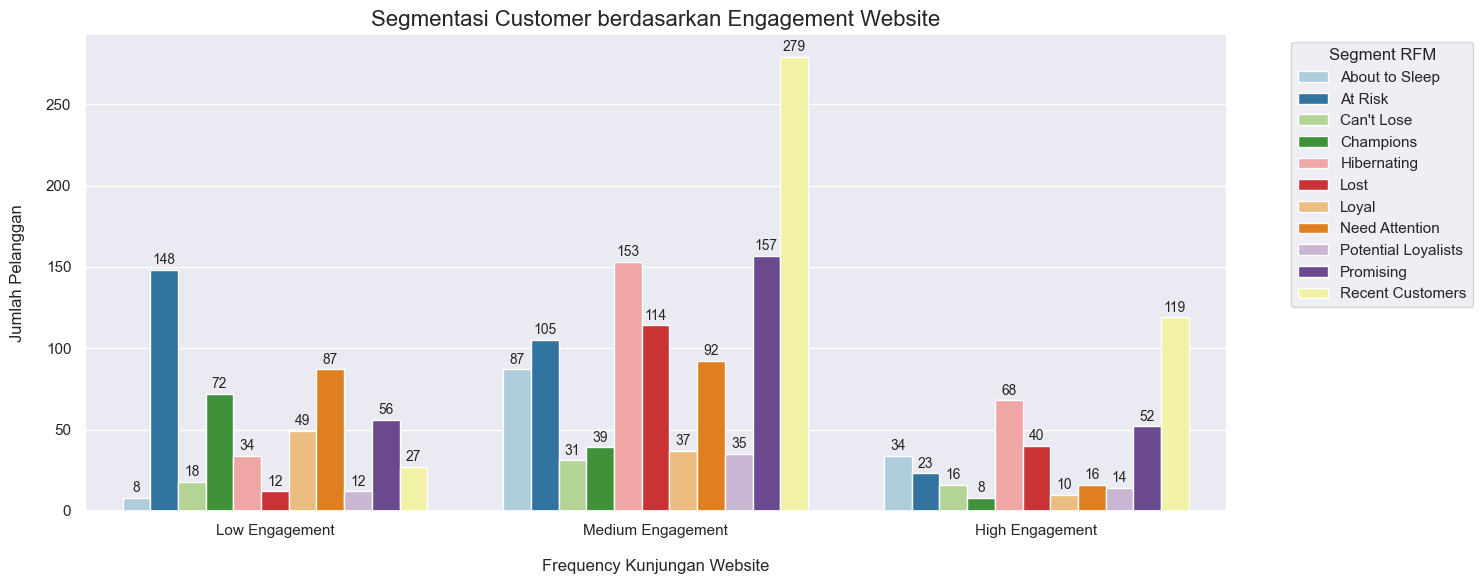

In [53]:
# Mengubah kolom 'Engagement' menjadi kategori terurut
engagement_order = ['Low Engagement', 'Medium Engagement', 'High Engagement']
segmen_kunjungan['Engagement'] = pd.Categorical(segmen_kunjungan['Engagement'], categories=engagement_order, ordered=True)

# Membuat vertical bar plot
plt.figure(figsize=(15, 6))  # Ukuran plot lebih besar agar lebih terbaca
ax = sns.barplot(data=segmen_kunjungan, x='Engagement', y='Jumlah_Pelanggan', hue='Segment', palette='Paired')

# Menambahkan angka pada setiap bar
for container in ax.containers:
    # Menambahkan label di atas setiap bar
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, padding=2)

# Menambahkan judul dan label
plt.title('Segmentasi Customer berdasarkan Engagement Website', fontsize=16)
plt.xlabel('Frequency Kunjungan Website', fontsize=12, labelpad=15)
plt.ylabel('Jumlah Pelanggan', fontsize=12, labelpad=15)

# Menampilkan plot
plt.legend(title='Segment RFM', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Agar layout lebih rapi
plt.show()


**Insight**
1. Champions, Loyal, dan Potential Loyalists:
- Pelanggan dalam segmen ini cenderung memiliki engagement tinggi terhadap brand secara keseluruhan, tetapi frekuensi kunjungan ke website justru relatif rendah. Hal ini mungkin menunjukkan bahwa mereka sudah cukup puas dengan produk atau layanan, sehingga jarang merasa perlu untuk kembali mengunjungi website. Alternatifnya, engagement mereka mungkin lebih terpusat di kanal lain.

2. Recent Customers:
- Segmen Recent Customers mendominasi frekuensi kunjungan, terutama di kategori Medium Engagement dan High Engagement. Ini menunjukkan bahwa pelanggan baru memiliki antusiasme tinggi untuk mengeksplorasi produk atau layanan melalui website.

3. Hibernating, Lost, dan About to Sleep
- Ketiga segmen ini menunjukkan pola yang serupa yaitu Mereka cenderung cukup sering mengunjungi websMeski memiliki aktivitas digital yang cukup tinggi, mereka mungkin tidak lagi terlibat dalam transaksi atau aktivitas bernilai tinggi. Pelanggan dalam segmen ini berpotensi meninggalkan brand jika tidak ada langkah intervensi yang tepat.

### **Conclusion and Recommendation**

##### `1. Demografi Pelanggan`

**a. Distribusi Usia, Pendidikan, Income, Jumlah Anggota Keluarga, dan Status Perkawinan**<div style="text-align: justify;">

   - Kesimpulan:
     - Mayoritas pelanggan berada dalam usia produktif (25–64 tahun) dan memiliki tingkat pendidikan tinggi (Undergraduate, Master, dan PhD), sementara pelanggan dengan pendidikan dasar (Basic) sangat sedikit. Hal ini menunjukkan daya tarik supermarket terhadap segmen pelanggan yang terdidik.
     - Pendapatan pelanggan didominasi oleh kelompok Middle Class, Lower Middle Class, dan Lower Class (97%), sedangkan Upper Middle Class dan Upper Class hanya berkontribusi sebesar 3%.
     - Sebagian besar pelanggan memiliki keluarga kecil (2–3 anggota, 72%) dan berstatus Together (Menikah atau In Relationship), yang menjadi segmen dominan dalam distribusi pelanggan.

   - Rekomendasi:
     - Gunakan pendekatan pemasaran berbasis informasi dan edukasi untuk menarik perhatian pelanggan terdidik.
     - Buat kampanye yang menargetkan pasangan atau keluarga, seperti promosi produk untuk kebutuhan rumah tangga.
     - Fokuskan pemasaran pada kelompok usia produktif (25–64 tahun), misalnya dengan promosi paket hemat yang sesuai dengan gaya hidup aktif.


**b. Hubungan antara Pendapatan dengan Variabel Lainnya**

   - Kesimpulan:
     - Pendapatan tinggi berkorelasi positif dengan pembelian wine dan produk daging, namun negatif dengan frekuensi kunjungan ke situs website.
     - Pelanggan dengan pendapatan rendah lebih sering mengunjungi website, tetapi kontribusi pembelian mereka lebih kecil.

   - Rekomendasi:
     - Tingkatkan promosi wine ke segmen pelanggan berpendapatan tinggi melalui katalog eksklusif atau acara *wine tasting*. Promosikan paket makanan premium yang menyertakan wine dan daging untuk acara spesial, seperti perayaan atau makan malam keluarga.
     - Tingkatkan pengalaman belanja offline untuk pelanggan berpendapatan tinggi yang jarang mengunjungi website. Untuk pelanggan berpendapatan rendah yang lebih sering mengunjungi website, sediakan promosi khusus berbasis digital, seperti diskon tambahan untuk pembelian online.
</div>


##### `2. Analisis Pembelian`

   **a. Total Pembelian dan Rata-rata Transaksi per Kategori**

   <div style="text-align: justify;">

   - Kesimpulan:
     - Produk **Wines** memiliki kontribusi pembelian tertinggi oleh pelanggan, sementara **Fruits** adalah yang terendah.
     - Rata-rata nilai transaksi untuk semua produk relatif kecil dibandingkan dengan total pembelian. Hal ini menunjukkan bahwa kategori produk dengan total pembelian tinggi, seperti **Wines**, kemungkinan memiliki frekuensi pembelian yang tinggi meskipun nilai per transaksi cenderung rendah.

   - Rekomendasi:
     - Tingkatkan promosi produk **Fruits** melalui diskon atau bundling dengan produk populer seperti **Wines**.
     - Pertahankan frekuensi pembelian tinggi pada kategori unggulan dengan memberikan insentif loyalitas.

   </div>

   **b. Kanal Pembelian yang Paling Sering Digunakan**

   - Kesimpulan:
     - Hampir separuh dari total pelanggan lebih memilih untuk membeli produk melalui **toko fisik**. Selanjutnya, **Kanal Web** menempati posisi kedua, yang menunjukkan bahwa cukup banyak pelanggan juga memilih berbelanja melalui website. Sementara **kanal katalog** berkontribusi paling sedikit di antara ketiga kanal pembelian.

   - Rekomendasi:
     - Tingkatkan pengalaman belanja offline untuk memperkuat keunggulan kanal **toko fisik**.
     - Dorong pembelian online melalui promosi eksklusif, misalnya diskon khusus untuk transaksi **web**.

   **c. Hubungan antara Pendapatan dengan Total Pembelian**

   - Kesimpulan:
     - Ada hubungan positif yang signifikan antara pendapatan dan total pembelian, terutama untuk produk premium.

   - Rekomendasi:
     - Fokuskan pemasaran produk premium seperti **wine** kepada pelanggan dengan pendapatan tinggi.

##### `3. Analisis Perilaku Pelanggan:`

   - Melakukan segmentasi pelanggan menggunakan pendekatan **RFM Analysis** untuk memahami pola keterlibatan mereka

![RFM Conclusion and Recommendation](Kesimpulan_RFM.png)

##### `4. Evaluasi Campaign Pemasaran`: Menilai tingkat keberhasilan kampanye pemasaran yang telah dilakukan

   **a. Melihat trend penerimaan customer terhadap campaign yang dilakukan Supermarket**

   - Kesimpulan:
     - Secara keseluruhan, tingkat penerimaan campaign masih rendah dibandingkan dengan jumlah yang menolak di setiap campaign. Hal ini menunjukkan bahwa mayoritas pelanggan tidak tertarik dengan campaign yang diberikan.
     - Campaign kedua menunjukkan hasil yang sangat buruk dengan hanya 26 pelanggan yang menerima tawaran dari total 2052 pelanggan. Ini menunjukkan bahwa tawaran pada campaign tersebut kurang relevan atau tidak menarik bagi pelanggan.
     - Campaign terakhir menunjukkan peningkatan signifikan dengan 310 pelanggan yang menerima tawaran. Ini menunjukkan bahwa ada perubahan positif dalam strategi atau konten tawaran yang lebih sesuai dengan kebutuhan pelanggan.
     - Meskipun ada peningkatan penerimaan pada campaign ketiga hingga kelima, jumlah penerimaan tetap kecil dibandingkan dengan penolakan, yang menunjukkan bahwa masih banyak perbaikan yang dibutuhkan.

   - Rekomendasi:
     - Campaign kedua perlu dievaluasi lebih mendalam untuk mengetahui alasan rendahnya penerimaan. Bisa jadi isi tawaran atau cara penyampaiannya tidak sesuai dengan preferensi pelanggan.
     - Untuk meningkatkan pemahaman tentang penolakan terhadap tawaran, lakukan survei atau kontak langsung dengan pelanggan yang menolak tawaran untuk mengetahui alasan mereka. Ini dapat memberikan wawasan tentang apa yang dapat diperbaiki dalam campaign mendatang.
     - Campaign terakhir yang berhasil menarik 310 pelanggan dapat dijadikan referensi untuk meningkatkan campaign berikutnya. Identifikasi faktor keberhasilan campaign tersebut dan lakukan replikasi strategi yang serupa.

   **b. Distribusi dan Segmentasi Customer Berdasarkan Respon Campaign**

   - Kesimpulan:
     - Berdasarkan distribusi respon terhadap campaign, pelanggan dapat dikelompokkan dalam tiga kategori yaitu **Tidak Respon (72,4%)**, **Respon Parsial (25,5%)**, **Respon Tinggi (2%)**.
     
     - Segmentasi customer dengan kategori respon sbb:

       i. Segmen Tidak Respon:
          - Pendapatan rendah, ukuran keluarga besar, jarang berbelanja online atau lewat katalog.
          - Lebih sulit dijangkau dengan campaign saat ini.

       ii. Segmen Respon Parsial:
          - Pendapatan moderat, ukuran keluarga kecil, lebih aktif belanja online dan di toko fisik.
          - Potensi untuk pemasaran tersegmentasi pada produk tertentu seperti anggur dan daging.

       iii. Segmen Respon Tinggi:
          - Daya beli tinggi dan pengeluaran besar untuk produk premium.
          - Potensi besar untuk program loyalitas atau upselling.

   - Rekomendasi:
     - Prioritaskan Segmen Respon Tinggi: Segmen ini memiliki potensi besar karena daya beli yang tinggi dan keterlibatan yang kuat. Fokuskan upaya pemasaran untuk mempertahankan mereka dengan menawarkan promosi eksklusif dan program loyalitas.
     - Untuk segmen yang tidak merespons, coba pendekatan yang lebih fleksibel dan memberikan penawaran yang lebih sesuai dengan kebutuhan mereka dan lakukan survei untuk memahami mengapa mereka tidak merespons.


##### `5. Cohort Analysis`: Menganalisis tren peningkatan dan penurunan jumlah customer dari tahun 2012 - 2014

- Kesimpulan:
  - 2012: Lonjakan pelanggan terjadi pada bulan Agustus, kemudian stabil hingga Desember. 
  - 2013: Fluktuasi jumlah pelanggan signifikan, dengan puncak tertinggi pada bulan Oktober. 
  - 2014: Penurunan pelanggan terjadi pada Februari, tetapi ada pemulihan di Maret. Penurunan berlanjut di Mei dan Juni.

- Rekomendasi:
  - Fokus pada Stabilisasi: Pastikan pertumbuhan pelanggan lebih konsisten dan berkelanjutan.

##### `6. Evaluasi Engagement Website`

**a. Persentase Pelanggan Berdasarkan Frekuensi Kunjungan ke Website**

- Kesimpulan:
  - Sebagian besar pelanggan berkunjung ke website Supermarket sebanyak 6-7 kali (17.5% dan 15.01%), menunjukkan engagement website Supermarket berada di level menengah.
  - Hanya sedikit pelanggan yang tidak mengunjungi website (0.54%), mengindikasikan bahwa sebagian besar pelanggan sudah memiliki interaksi dengan website.
  - Kunjungan yang sangat tinggi (lebih dari 9 kali) sangat jarang terjadi, dengan hanya 3.9% untuk 9 kali kunjungan dan kurang dari 1% untuk 10 kali atau lebih.

- Rekomendasi:
  - Fokuskan upaya untuk meningkatkan frekuensi kunjungan pelanggan, misalnya dengan konten yang menarik untuk mendorong kunjungan lebih intens.

**b. Segmentasi Customer Berdasarkan Jumlah Kunjungan Website**

- Kesimpulan:
  1. Champions, Loyal, dan Potential Loyalists:
     - Pelanggan dalam segmen ini memiliki engagement tinggi terhadap brand, tetapi frekuensi kunjungan ke website cenderung rendah.
  2. Recent Customers:
     - Pelanggan baru menunjukkan antusiasme tinggi untuk mengunjungi website, terutama di kategori Medium dan High Engagement.
  3. Hibernating, Lost, dan About to Sleep:
     - Pelanggan dalam segmen ini sering mengunjungi website tetapi tidak terlibat dalam transaksi yang bernilai tinggi. Mereka berpotensi meninggalkan brand jika tidak ada upaya intervensi yang tepat.

- Rekomendasi:
  - Manfaatkan tingginya engagement pelanggan baru untuk meningkatkan frekuensi kunjungan dan pembelian mereka.
  - Reaktivasi Segmen Hibernating, Lost, dan About to Sleep: Fokuskan upaya untuk melibatkan kembali segmen ini dengan kampanye yang lebih terpersonal atau penawaran eksklusif, guna menghindari kehilangan pelanggan lebih lanjut.
